In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn.preprocessing as preprocessing 

/kaggle/input/its-a-fraud/train.csv
/kaggle/input/its-a-fraud/test.csv
/kaggle/input/its-a-fraud/mock_submission.csv


preprocessing

In [2]:
train_identity = pd.read_csv('/kaggle/input/its-a-fraud/train.csv')
test_identity = pd.read_csv('/kaggle/input/its-a-fraud/test.csv')

In [3]:
train_identity.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3424175,0,11053717,49.00,W,5033,269.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3206179,0,5150800,57.95,W,4527,376.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3410455,0,10713596,115.95,W,2772,512.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3058578,0,1611950,100.00,H,14290,512.0,150.0,visa,226.0,...,chrome 62.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,Windows
4,3242131,0,6111087,95.00,W,12839,321.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train_identity.shape

(442905, 434)

In [5]:
train_identity.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             337369
id_37             337369
id_38             337369
DeviceType        337504
DeviceInfo        353982
Length: 434, dtype: int64

In [6]:
train_identity.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,4.429050e+05,442905.000000,4.429050e+05,442905.000000,442905.000000,436201.000000,441724.000000,439730.000000,393811.000000,393811.000000,...,104324.000000,33788.000000,104289.000000,104244.000000,3865.000000,3870.000000,3552.000000,3842.000000,3865.000000,58109.000000
mean,3.282059e+06,0.034989,7.366857e+06,135.273690,9901.266082,362.542367,153.188550,199.276736,290.654596,86.799658,...,189.429604,14.233278,353.493475,403.862774,370.234670,16.025581,12.851351,328.556221,149.187581,26.498202
std,1.705119e+05,0.183753,4.617568e+06,232.955213,4901.960786,157.784513,11.314301,41.232396,101.745146,2.684822,...,30.360205,1.561150,141.183369,152.298443,198.839627,6.947584,2.417639,97.420034,32.180887,3.733750
min,2.987002e+06,0.000000,8.646900e+04,0.251000,1001.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134224e+06,0.000000,3.021834e+06,43.744000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282155e+06,0.000000,7.301614e+06,68.950000,9680.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429574e+06,0.000000,1.123641e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,500.000000,14.000000,15.000000,367.750000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,6085.230000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,660.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [7]:
pd.set_option('display.max_rows',None)

In [8]:
train_identity.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               6704
card3               1181
card4               1191
card5               3175
card6               1185
addr1              49094
addr2              49094
dist1             264291
dist2             414737
P_emaildomain      70931
R_emaildomain     340177
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                   935
D2                210525
D3                197091
D4                126656
D5                232318
D6                388196
D7                413817
D8                386742
D9                386742


In [9]:
train_identity["dist2"].unique().shape

(1577,)

In [10]:
train_identity["dist1"].unique().shape

(2544,)

In [11]:
train_identity["dist2"].describe()

count    28168.000000
mean       230.182974
std        520.430820
min          0.000000
25%          7.000000
50%         37.000000
75%        206.000000
max      11623.000000
Name: dist2, dtype: float64

In [12]:
for i in train_identity.columns:
    if (train_identity[i].isna().sum()<10000):
        train_identity.drop(axis="rows", labels=train_identity.index[train_identity[i].isna()], inplace=True)
    #elif(train_identity[i].isna().sum()>0.95*442905):
        #train_identity.drop(axis="columns",labels=i,inplace=True)

In [13]:
train_identity.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2                  0
card3                  0
card4                  0
card5                  0
card6                  0
addr1              48310
addr2              48310
dist1             258616
dist2             405694
P_emaildomain      69545
R_emaildomain     332307
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                     0
D2                205077
D3                192183
D4                124319
D5                227294
D6                379691
D7                404887
D8                378023
D9                378023


In [14]:
train_identity["addr1"].describe()

count    385274.000000
mean        290.704460
std         101.683624
min         100.000000
25%         204.000000
50%         299.000000
75%         330.000000
max         540.000000
Name: addr1, dtype: float64

In [15]:
train_identity["addr2"].describe()

count    385274.000000
mean         86.799221
std           2.684673
min          10.000000
25%          87.000000
50%          87.000000
75%          87.000000
max         102.000000
Name: addr2, dtype: float64

We can replace the null values with mean in both addr1 and addr2.

In [16]:
test_identity.isna().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               2229
card3                384
card4                386
card5               1084
card6                386
addr1              16612
addr2              16612
dist1              87980
dist2             138176
P_emaildomain      23525
R_emaildomain     113072
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                   334
D2                 70272
D3                 65787
D4                 42266
D5                 77523
D6                129157
D7                137806
D8                128872
D9                128872
D10                19093


In [17]:
train_identity["addr1"].fillna(train_identity["addr1"].mean(),inplace=True)
train_identity["addr2"].fillna(train_identity["addr2"].mean(),inplace=True)

In [18]:
test_identity["addr1"].fillna(test_identity["addr1"].mean(),inplace=True)
test_identity["addr2"].fillna(test_identity["addr2"].mean(),inplace=True)

Lets analyse the remaining columns of different types:

for columns dist1 and dist2, given in the dataset distribution - distances between (not limited) billing address, mailing address, zip code, IP address, phone area, etc.”
We can see that dist2 has lot more null values than dist1. So out of both the distances it's better to remove the "dist2" column since it has 90%+ null values.

In [19]:
train_identity.drop(axis="columns",labels="dist2",inplace=True)
test_identity.drop(axis="columns",labels="dist2",inplace=True)

D1-D15: timedelta, such as days between previous transaction, etc. 
D7 has 90%+ null values out of these so we can drop it. 

In [20]:
train_identity["D7"].describe()

count    28697.000000
mean        41.847510
std         99.787222
min          0.000000
25%          0.000000
50%          0.000000
75%         18.000000
max        843.000000
Name: D7, dtype: float64

Columns D10 and D15 have the least number of null values comparetively out of the D values.

In [21]:
train_identity["D10"].describe()

count    377393.000000
mean        124.501241
std         182.939978
min           0.000000
25%           0.000000
50%          15.000000
75%         199.000000
max         876.000000
Name: D10, dtype: float64

In [22]:
train_identity["D15"].describe()

count    367926.000000
mean        164.419981
std         203.086981
min         -83.000000
25%           0.000000
50%          53.000000
75%         316.000000
max         879.000000
Name: D15, dtype: float64

<AxesSubplot:xlabel='D10'>

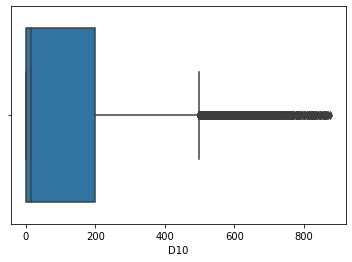

In [23]:
sns.boxplot(x=train_identity["D10"])

<AxesSubplot:xlabel='D15'>

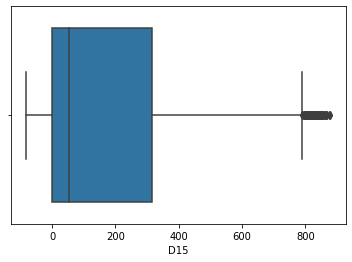

In [24]:
sns.boxplot(x=train_identity["D15"])

In [25]:
test_df = train_identity[["D1","D2","D3","D4","D5","D6","D7","D8","D9","D10","D11","D12","D13","D14","D15"]]

<AxesSubplot:>

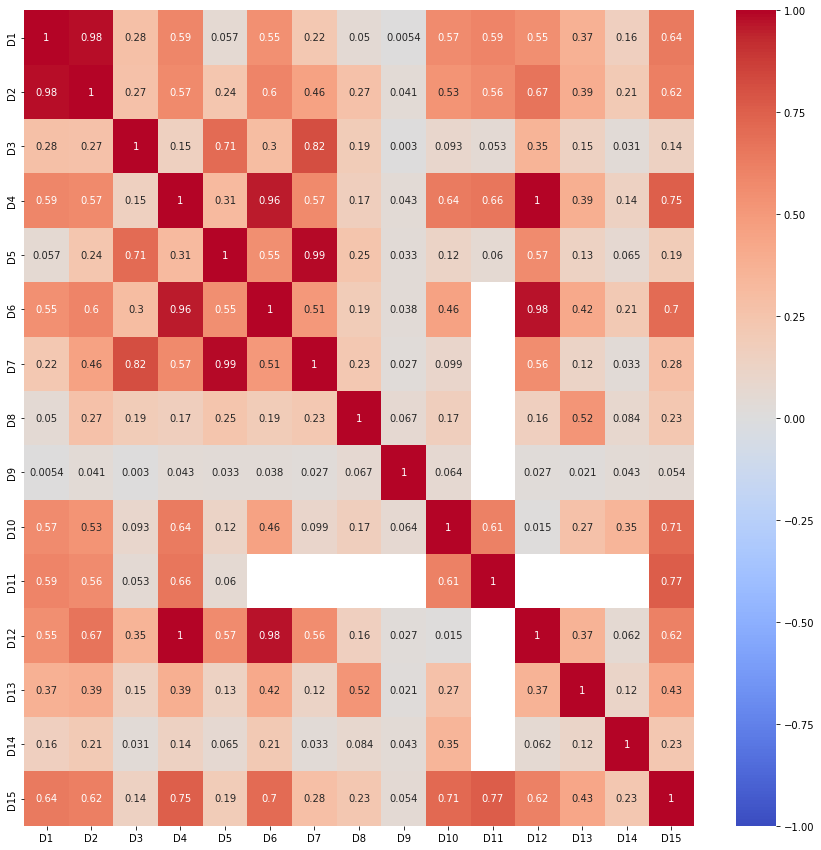

In [26]:
test_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(test_df.corr(), vmin=-1, cmap="coolwarm", annot=True)

Because D10 and D15 are not highly correlated with any of the other columns, we cannot remove these columns completely, and since they have a significant number of rows as null (>12%) we also cant remove those corresponding rows even in the best case where the rows of D10 and D15 are null at common indexes. We have to decide whether to replace with mean, median or mode.


In [27]:
# replacing with median for D10 and D15.
train_identity["D10"].fillna(train_identity["D10"].median(),inplace=True)
train_identity["D15"].fillna(train_identity["D15"].median(),inplace=True)

In [28]:
# replacing with median for D10 and D15.
test_identity["D10"].fillna(test_identity["D10"].median(),inplace=True)
test_identity["D15"].fillna(test_identity["D15"].median(),inplace=True)

Now, from the correlation matrix we can see that D2 is highly correlated to D1 and since D1 has no null values, we can remove the column D2 because its behaviour is captured by D1

In [29]:
train_identity.drop(axis="columns",labels="D2",inplace=True)
test_identity.drop(axis="columns",labels="D2",inplace=True)

Similarly, we can see that D6 and D12 are highly correlated with D4 and D4 has significantly lesser null values than D6 and D12 so we can remove those two columns, likewise with D7 and D5 we can remove D7.

In [30]:
train_identity.drop(axis="columns",labels=["D6","D12","D7"],inplace=True)
test_identity.drop(axis="columns",labels=["D6","D12","D7"],inplace=True)

D13,D14 and D8,D9 can be dropped as they have the next highest number of null values.

In [31]:
train_identity.drop(axis="columns",labels=["D13","D14"],inplace=True)
test_identity.drop(axis="columns",labels=["D13","D14"],inplace=True)

In [32]:
train_identity.drop(axis="columns",labels=["D8","D9"],inplace=True)
test_identity.drop(axis="columns",labels=["D8","D9"],inplace=True)

<AxesSubplot:>

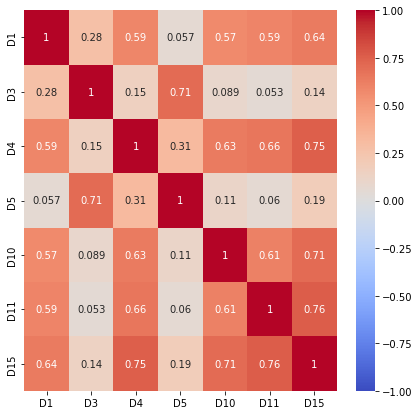

In [33]:
test_df = train_identity[["D1","D3","D4","D5","D10","D11","D15"]]
test_df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(test_df.corr(), vmin=-1, cmap="coolwarm", annot=True)

This is how our correlation matrix looks like now, We can also analyse further by looking at the correlation between each of these columns with "isFraud" and see if we can drop any more columns.

<AxesSubplot:>

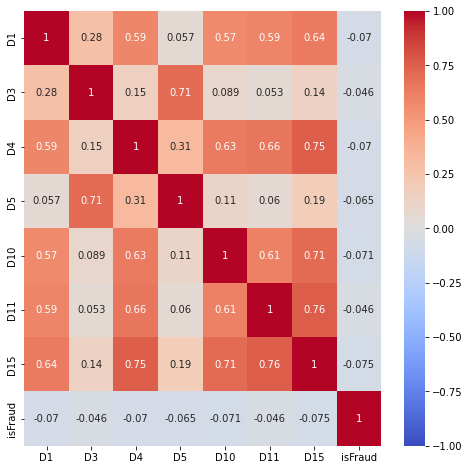

In [34]:
test_df = train_identity[["D1","D3","D4","D5","D10","D11","D15","isFraud"]]
test_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(test_df.corr(), vmin=-1, cmap="coolwarm", annot=True)

Directly, we can see that we can drop columns D3 and D11 since they are least related out of all the columns to "isFraud"

In [35]:
train_identity.drop(axis="columns",labels=["D3","D11"],inplace=True)
test_identity.drop(axis="columns",labels=["D3","D11"],inplace=True)

We are also dropping D5 as it has significantly more null values compared to the others and it is lesser related.

In [36]:
train_identity.drop(axis="columns",labels="D5",inplace=True)
test_identity.drop(axis="columns",labels="D5",inplace=True)

Since D4 has not too less nor too many null values, we have to use sophisticated methods to infer the data-
we can look at the missingness of D4 in order to understand how the null values are distributed

In [37]:
import missingno as mno

In [38]:
test_df = train_identity[["D1","D4"]]

<AxesSubplot:>

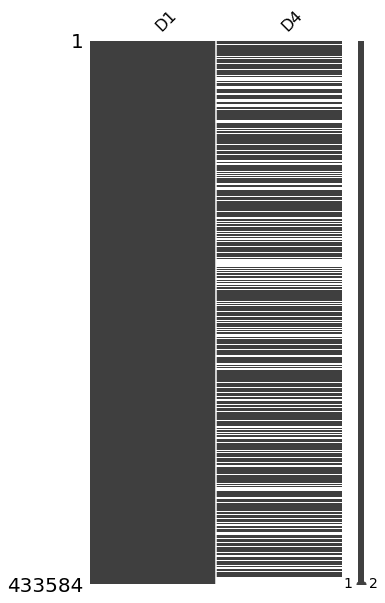

In [39]:
mno.matrix(test_df,figsize=(5,10))

We use the method of regression to impute data in D4.

When we have multiple variables with missing values, we can't just directly use Regression Imputation to impute one of them as the predictors contain missing data themselves. But then, how can we impute one variable without imputing another?

We can avoid this Catch-22 situation by initially imputing all the variables with missing values using some trivial methods like Simple Random Imputation (we impute the missing data with random observed values of the variable) which is later followed by Regression Imputation of each of the variables iteratively.

In [40]:
def random_imputation(df, feature):

    number_missing = df[feature].isnull().sum()
    observed_values = df.loc[df[feature].notnull(), feature]
    df.loc[df[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace = True)
    
    return df

Before we proceed let's deal with categorical data.

In [41]:
#train_identity_cat=train_identity.select_dtypes(include=['object'])

In [42]:
#train_identity_cat.head()

In [43]:
#from sklearn.preprocessing import LabelEncoder

In [44]:
#column_names_to_one_hot = train_identity_cat.columns

In [45]:
#train_identity = pd.get_dummies(train_identity, columns=column_names_to_one_hot)

In [46]:
#train_identity.head()

In [47]:
#train_identity['D4' + '_imp'] = train_identity['D4']
#train_identity = random_imputation(train_identity, 'D4')

In [48]:
from sklearn import linear_model

In [49]:
train_identity_cat=train_identity.select_dtypes(include=['object'])


In [50]:
test_identity_cat=test_identity.select_dtypes(include=['object'])

In [51]:
'''
deter_data = pd.DataFrame(columns = ["Det" + "D4"])
        
deter_data["Det" + "D4"] = train_identity["D4" + "_imp"]
parameters = list(set(train_identity.columns) - set("D4") - {"D4" + '_imp'}-set(train_identity_cat.columns))

#Create a Linear Regression model to estimate the missing data
model = linear_model.LinearRegression()
model.fit(X = train_identity[parameters], y = train_identity["D4" + '_imp'])

#observe that I preserve the index of the missing data from the original dataframe
deter_data.loc[train_identity["D4"].isnull(), "Det" + "D4"] = model.predict(train_identity[parameters])[train_identity["D4"].isnull()]
'''

'\ndeter_data = pd.DataFrame(columns = ["Det" + "D4"])\n        \ndeter_data["Det" + "D4"] = train_identity["D4" + "_imp"]\nparameters = list(set(train_identity.columns) - set("D4") - {"D4" + \'_imp\'}-set(train_identity_cat.columns))\n\n#Create a Linear Regression model to estimate the missing data\nmodel = linear_model.LinearRegression()\nmodel.fit(X = train_identity[parameters], y = train_identity["D4" + \'_imp\'])\n\n#observe that I preserve the index of the missing data from the original dataframe\ndeter_data.loc[train_identity["D4"].isnull(), "Det" + "D4"] = model.predict(train_identity[parameters])[train_identity["D4"].isnull()]\n'

In [52]:
train_identity["D4"].describe()

count    309265.000000
mean        140.649420
std         191.531246
min         -83.000000
25%           0.000000
50%          26.000000
75%         255.000000
max         869.000000
Name: D4, dtype: float64

In [53]:
train_identity["D4"].value_counts()

 0.0      121771
 1.0        3894
 2.0        2490
 3.0        1923
 4.0        1741
 7.0        1723
 5.0        1611
 14.0       1565
 6.0        1483
 8.0        1327
 28.0       1184
 9.0        1156
 13.0       1141
 15.0       1097
 12.0       1064
 11.0       1034
 10.0       1008
 21.0        986
 29.0        971
 16.0        936
 27.0        873
 20.0        845
 18.0        844
 30.0        821
 26.0        819
 35.0        813
 22.0        812
 17.0        791
 42.0        776
 23.0        760
 25.0        724
 31.0        720
 19.0        711
 24.0        706
 34.0        704
 32.0        704
 56.0        695
 49.0        656
 33.0        653
 63.0        642
 36.0        629
 43.0        626
 57.0        610
 55.0        599
 70.0        573
 62.0        566
 41.0        562
 40.0        557
 37.0        554
 59.0        551
 91.0        549
 48.0        543
 38.0        538
 58.0        538
 39.0        532
 84.0        530
 61.0        514
 50.0        510
 90.0        5

In [54]:
# temporarily I am replacing the null values with mode for D4.
train_identity["D4"].fillna(train_identity["D4"].mode(),inplace=True)

In [55]:
test_identity["D4"].fillna(test_identity["D4"].mode(),inplace=True)

In [56]:
train_identity["D4"].isna().sum()

124319

Now we look at the columns M1-M9. These columns tell us about matches, such as names on card and address, etc.

In [57]:
train_identity[["M1","M2","M3","M4","M5","M6","M7","M8","M9"]].isna().sum()

M1    199685
M2    199685
M3    199685
M4    206790
M5    257537
M6    124993
M7    254833
M8    254823
M9    254823
dtype: int64

In [58]:
train_identity["M1"].describe()

count     233899
unique         2
top            T
freq      233881
Name: M1, dtype: object

The columns M1-M9 are categorical and have only two values -  either True or False (T or F), so in order to do further analysis, we have to one hot encode the columns.

In [59]:
match_df = train_identity[["M1","M2","M3","M4","M5","M6","M7","M8","M9","isFraud"]]

In [60]:
column_names_to_one_hot = ["M1", "M2","M3","M4","M5","M6","M7","M8","M9"]
match_df = pd.get_dummies(match_df, columns=column_names_to_one_hot)

In [61]:
match_df.head()

,isFraud,M1_F,M1_T,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M5_F,M5_T,M6_F,M6_T,M7_F,M7_T,M8_F,M8_T,M9_F,M9_T
0,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1


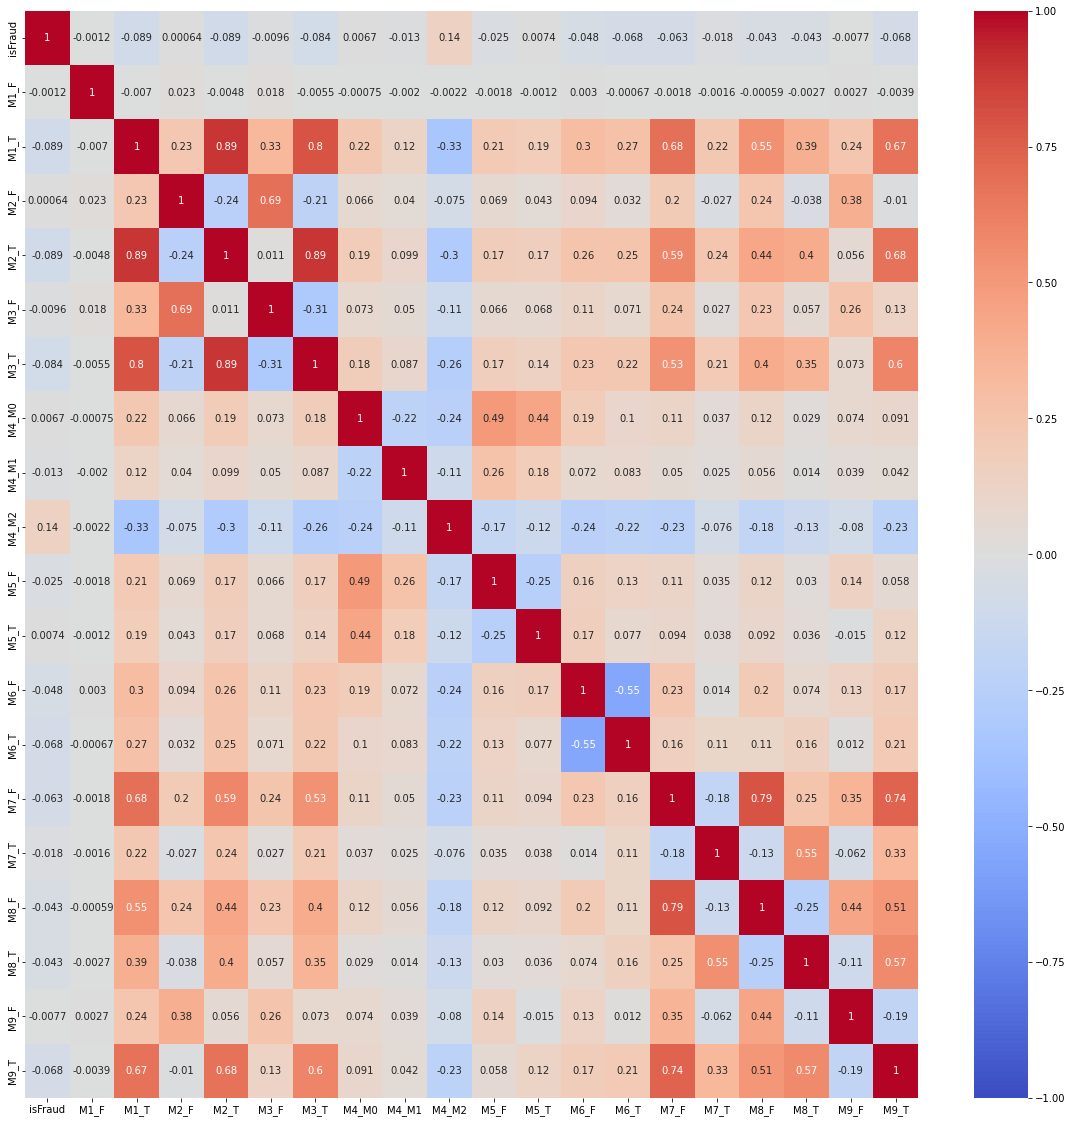

In [62]:
match_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(match_df.corr(), vmin=-1, cmap="coolwarm", annot=True)
plt.savefig('myfig.png')
plt.show()

Here we can observe that M1_T, M2_T and M3_T are the most correlated columns.

In [63]:
match_df.isna().sum()

isFraud    0
M1_F       0
M1_T       0
M2_F       0
M2_T       0
M3_F       0
M3_T       0
M4_M0      0
M4_M1      0
M4_M2      0
M5_F       0
M5_T       0
M6_F       0
M6_T       0
M7_F       0
M7_T       0
M8_F       0
M8_T       0
M9_F       0
M9_T       0
dtype: int64

In [64]:
#since correlation is less than 0.9, we are keeping all the columns intact.

The null values in the columns M1, M2, etc. are repesented after one hot encoding by making both values 0 in M1_F, M1_T and so on.

Lets look at the features of type Vxxx, other than the ones which have no null values. Now, we can put all the remaining ones into different classes based on common number of null values. 

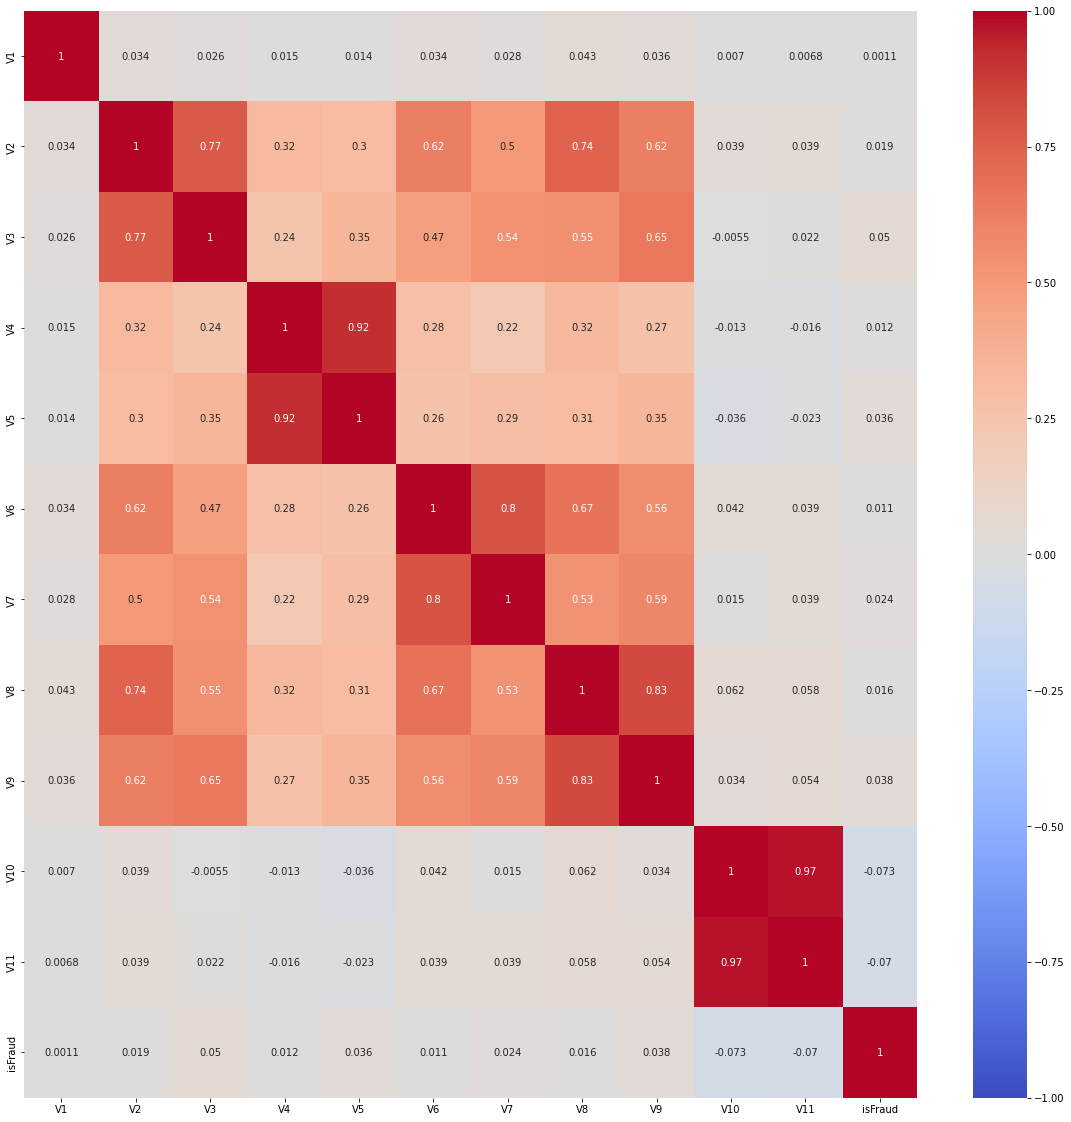

In [65]:
# V1-V11 have the same number of null values - 205480, lets anaylse these.
Vxxx_df = train_identity[["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11","isFraud"]]
plt.figure(figsize=(20,20))
sns.heatmap(Vxxx_df.corr(), vmin=-1, cmap="coolwarm", annot=True)
plt.show()

We can see that we can eliminate V4 and V11 (since they are less related to "isFraud" among the correlated ones)

In [66]:
train_identity.drop(axis="columns",labels=["V4","V11"],inplace=True)
test_identity.drop(axis="columns",labels=["V4","V11"],inplace=True)

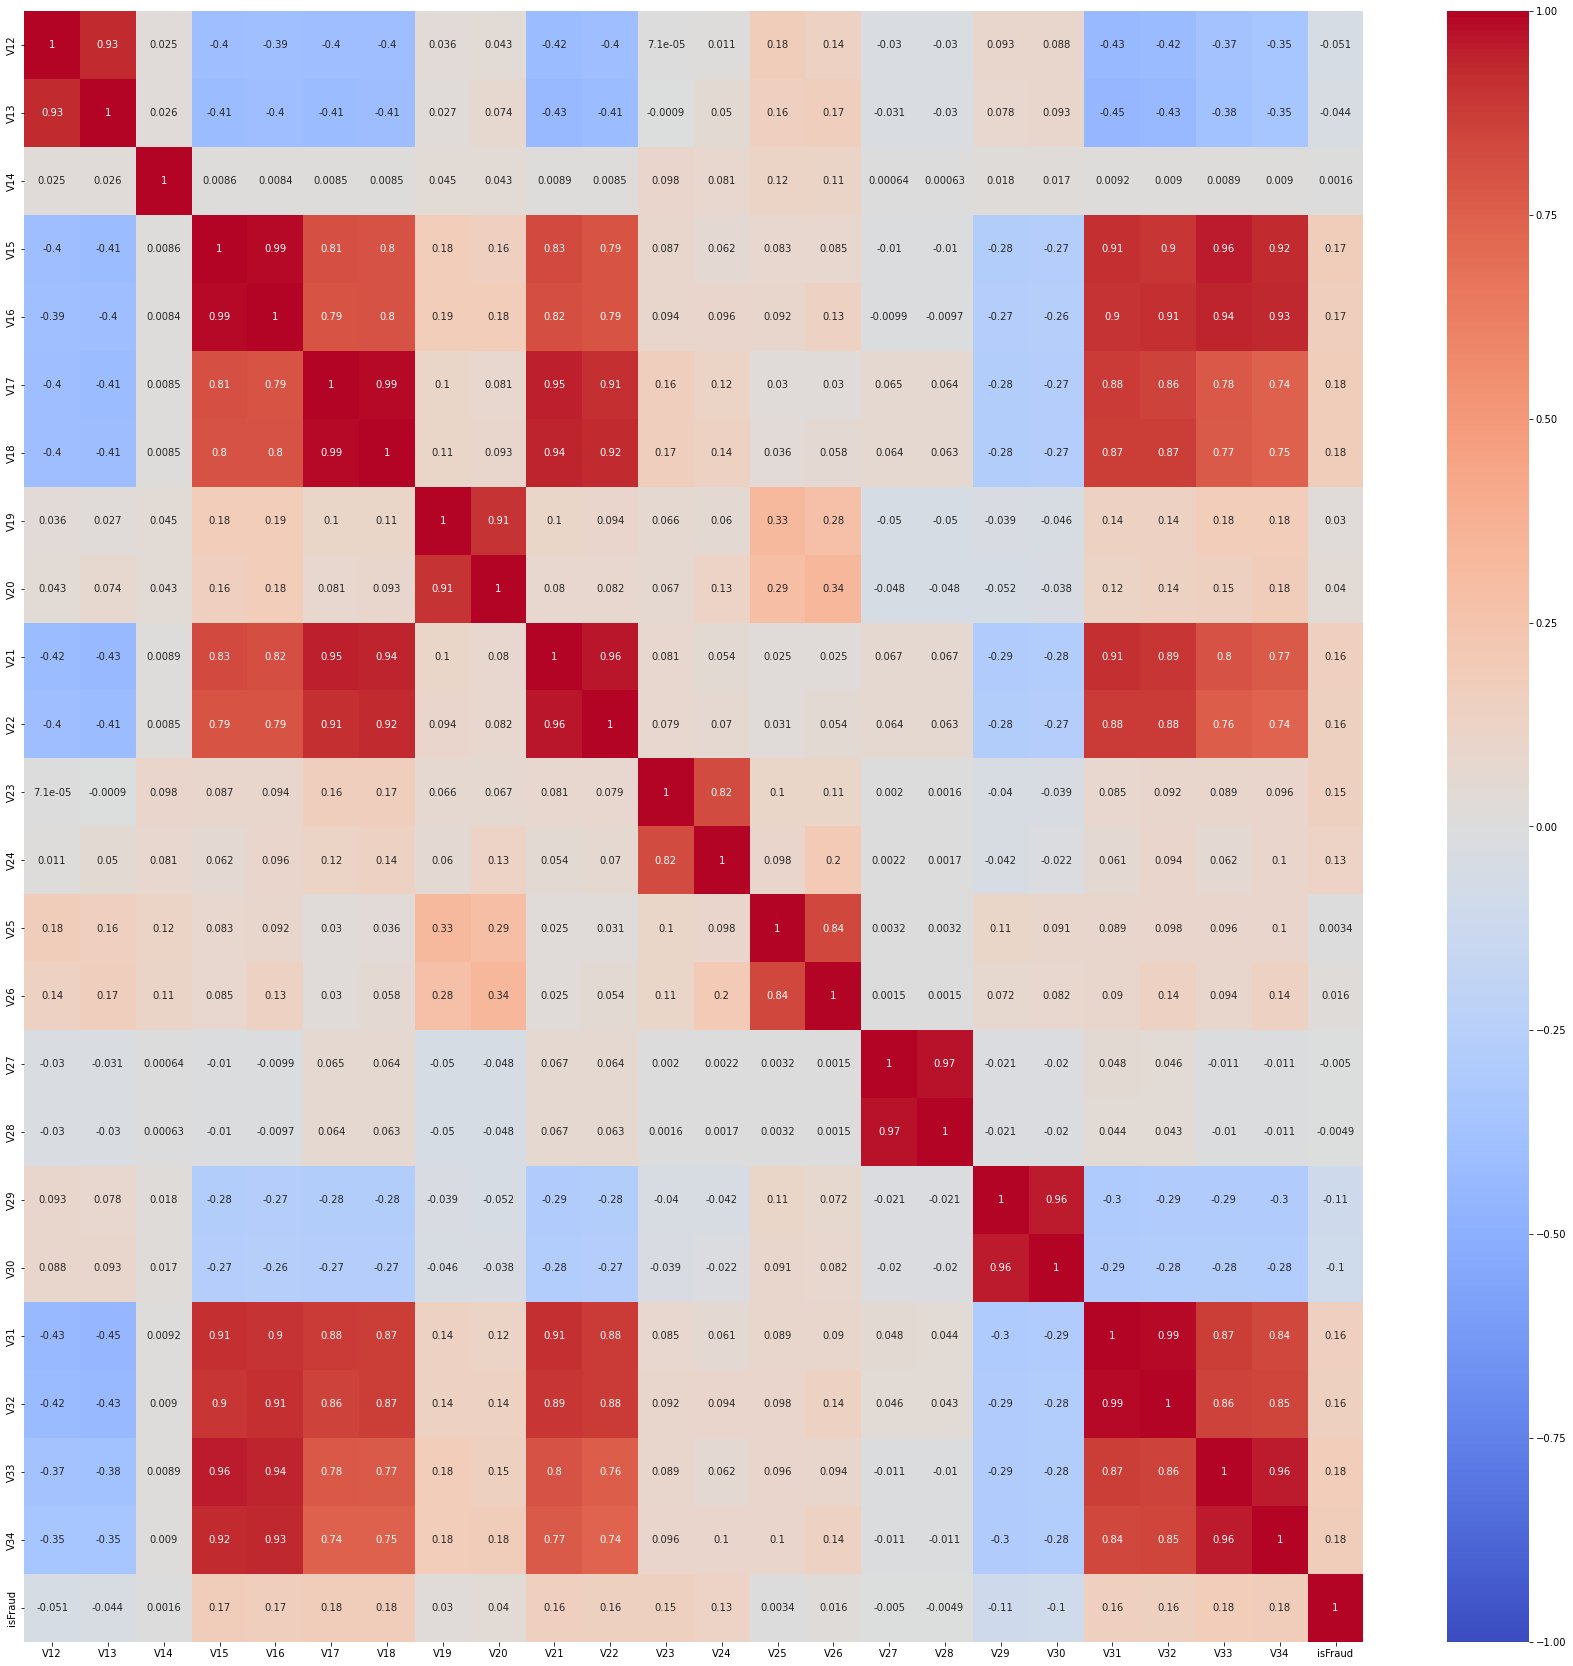

In [67]:
# V12-V34 have the same number of null values - 56226
temp_array =[]
tempstr = "V"
for i in range(12,35):
    temp_array.append(tempstr+str(i))
temp_array.append("isFraud")
Vxxx_df = train_identity[temp_array]
plt.figure(figsize=(30,30))
sns.heatmap(Vxxx_df.corr(), vmin=-1, cmap="coolwarm", annot=True)
plt.show()

Out of these we can eliminate V13,V15,V16,V34,V31,V32,V18,V21,V22,V28,V30. Similar reasoning as the previous elimination of columns.

In [68]:
train_identity.drop(axis="columns",labels=["V13","V15","V16","V34","V31","V32","V18","V21","V22","V28","V30"],inplace=True)
test_identity.drop(axis="columns",labels=["V13","V15","V16","V34","V31","V32","V18","V21","V22","V28","V30"],inplace=True)

In [69]:
# remaining columns in the above group are  - V12,V17,V23,V24,V25,V26,V27,V29,V33.
# Since there are less number of null values comparitively, we can look at the skew and decide to replace with mean/median/mode

In [70]:
train_identity["V12"].describe()

count    377358.000000
mean          0.558899
std           0.510457
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: V12, dtype: float64

In [71]:
train_identity["V12"].value_counts()

1.0    205882
0.0    169010
2.0      2375
3.0        91
Name: V12, dtype: int64

In [72]:
train_identity["V17"].value_counts()

0.0     328122
1.0      48208
2.0        668
3.0        213
4.0         74
5.0         28
6.0         19
7.0          9
8.0          5
9.0          5
10.0         2
14.0         1
12.0         1
15.0         1
13.0         1
11.0         1
Name: V17, dtype: int64

In [73]:
train_identity["V23"].value_counts()

1.0     366081
2.0       9589
3.0        923
0.0        271
4.0        247
5.0        113
6.0         58
7.0         29
8.0         21
9.0         14
10.0         8
11.0         2
12.0         1
13.0         1
Name: V23, dtype: int64

In [74]:
train_identity["V24"].value_counts()

1.0     358575
2.0      16231
3.0       1637
4.0        323
0.0        262
5.0        146
6.0         72
7.0         50
8.0         24
9.0         19
10.0        11
11.0         6
12.0         1
13.0         1
Name: V24, dtype: int64

In [75]:
train_identity["V25"].value_counts()

1.0    364936
0.0     10395
2.0      1885
3.0       131
4.0        10
7.0         1
Name: V25, dtype: int64

In [76]:
train_identity["V26"].value_counts()

1.0     363382
0.0       9372
2.0       4331
3.0        200
4.0         32
5.0         12
8.0         10
6.0          7
7.0          7
10.0         2
9.0          1
13.0         1
11.0         1
Name: V26, dtype: int64

In [77]:
train_identity["V27"].value_counts()

0.0    377063
1.0       291
2.0         3
4.0         1
Name: V27, dtype: int64

In [78]:
train_identity["V29"].value_counts()

0.0    235119
1.0    138560
2.0      3378
3.0       256
4.0        44
5.0         1
Name: V29, dtype: int64

In [79]:
train_identity["V33"].value_counts()

0.0    328285
1.0     48743
2.0       258
3.0        63
4.0         8
7.0         1
Name: V33, dtype: int64

In [80]:
train_identity["V27"].describe()

count    377358.000000
mean          0.000798
std           0.029064
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: V27, dtype: float64

It is better to replace the null values of these rows with the median.

In [81]:
for i in ["V12","V14","V17","V19","V20","V23","V24","V25","V26","V27","V29","V33"]:
    train_identity[i].fillna(train_identity[i].median(),inplace=True)
    test_identity[i].fillna(test_identity[i].median(),inplace=True)

Moving on to the next group, V35-V52 - 124356 null values.

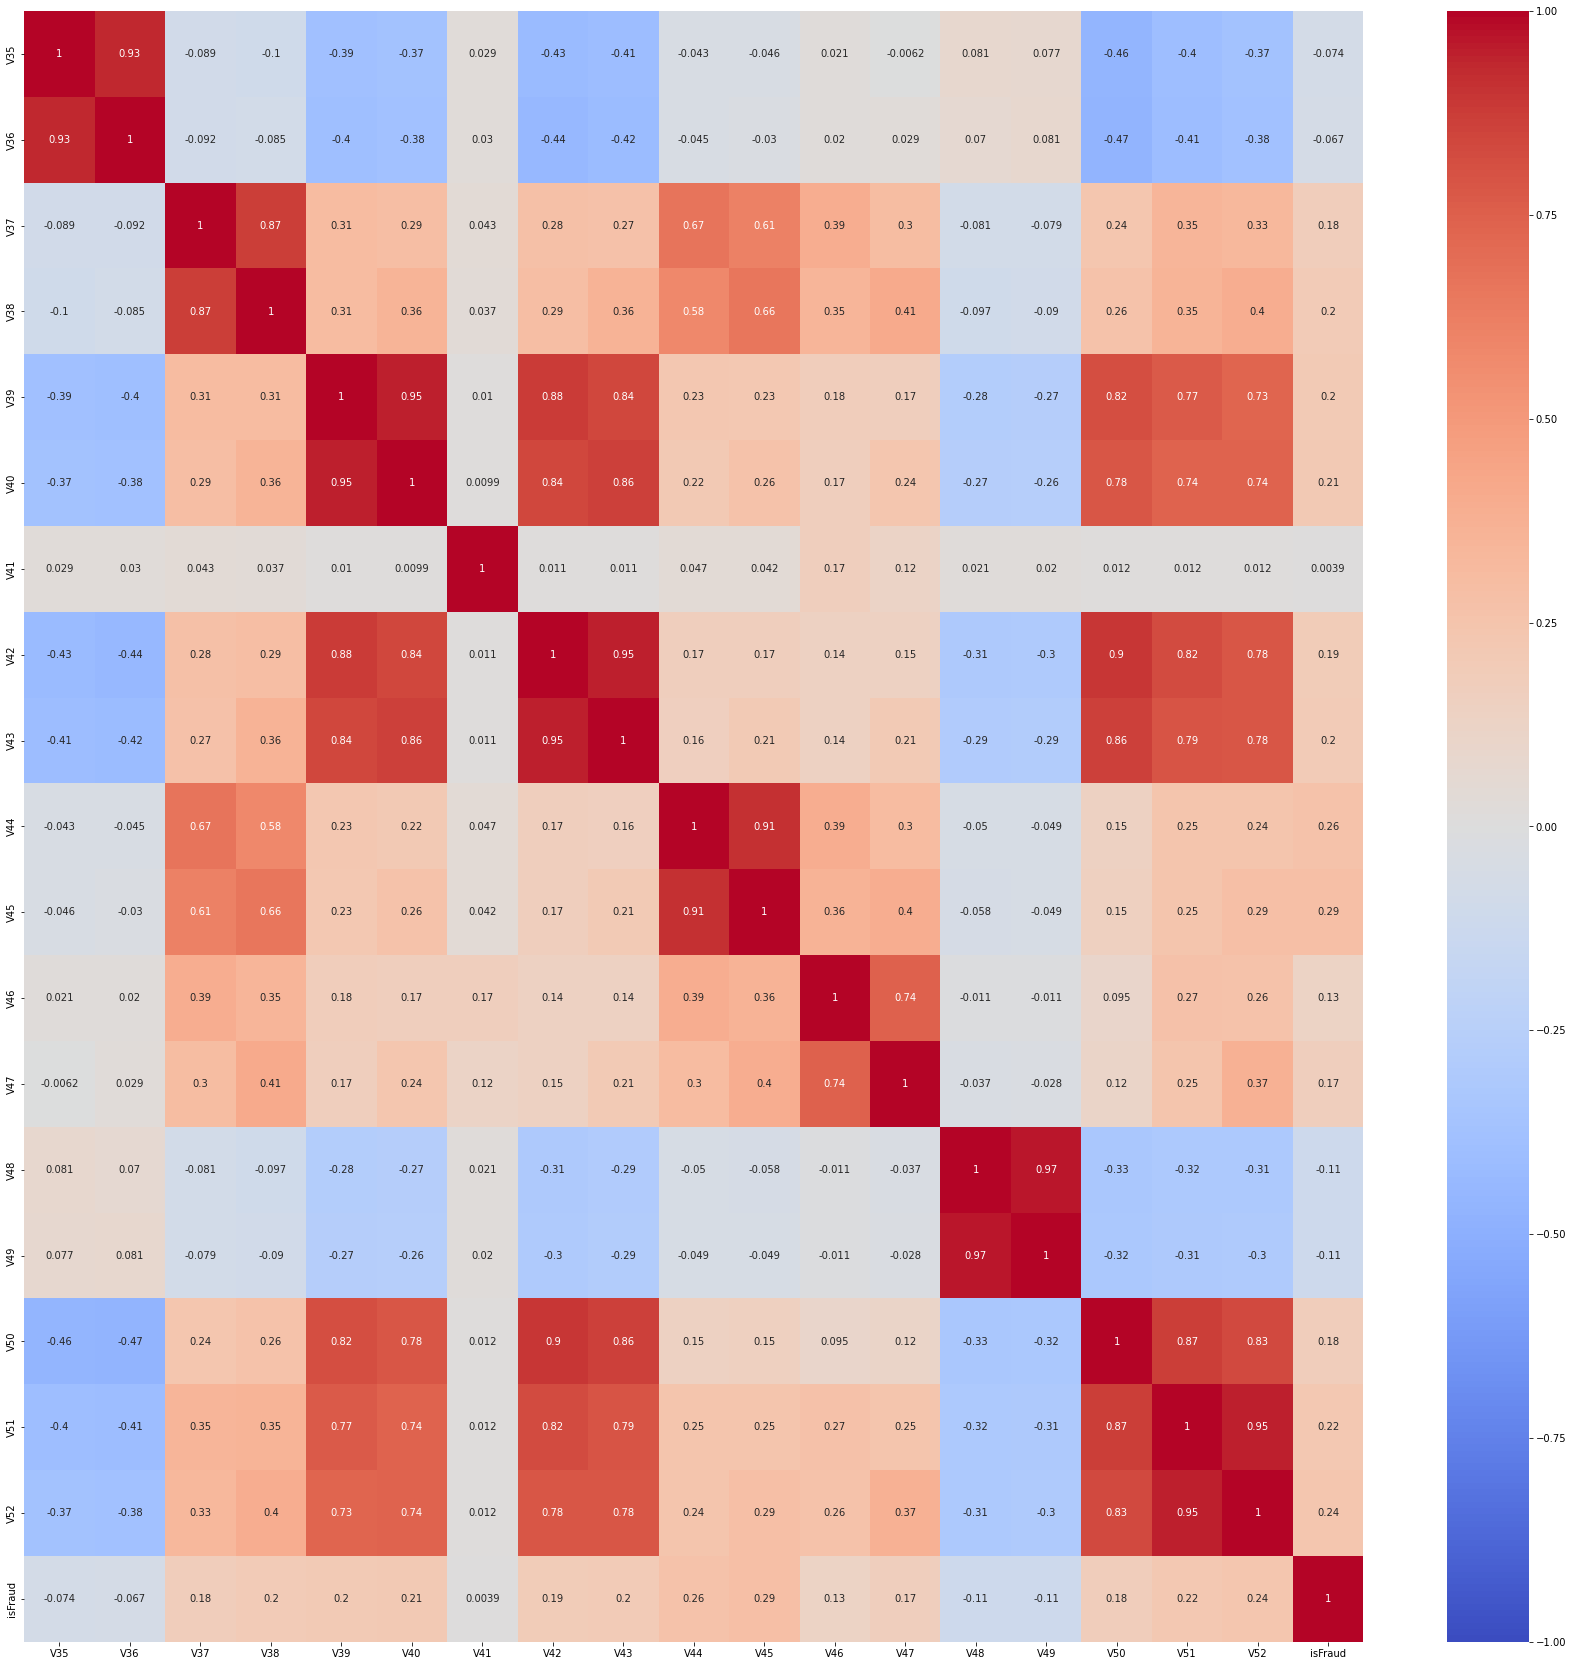

In [82]:
temp_array =[]
tempstr = "V"
for i in range(35,53):
    temp_array.append(tempstr+str(i))
temp_array.append("isFraud")
Vxxx_df = train_identity[temp_array]
plt.figure(figsize=(30,30))
sns.heatmap(Vxxx_df.corr(), vmin=-1, cmap="coolwarm", annot=True)
plt.show()

In [83]:
# we can drop the columns - V36,V37,V39,V42,V44,V49,V50,V51

In [84]:
train_identity.drop(axis="columns",labels=["V36","V37","V39","V42","V44","V44","V49","V50","V51"],inplace=True)
test_identity.drop(axis="columns",labels=["V36","V37","V39","V42","V44","V44","V49","V50","V51"],inplace=True)

In [85]:
train_identity["V35"].describe()

count    309228.000000
mean          0.541047
std           0.516333
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           3.000000
Name: V35, dtype: float64

In [86]:
train_identity["V35"].value_counts()

1.0    161863
0.0    144678
2.0      2617
3.0        70
Name: V35, dtype: int64

In [87]:
train_identity["V38"].value_counts()

1.0     280224
2.0      20627
3.0       4122
4.0       1592
5.0        847
6.0        457
7.0        328
0.0        254
8.0        175
9.0        115
10.0       111
11.0        75
12.0        73
13.0        33
14.0        30
16.0        22
15.0        18
17.0        15
24.0        13
21.0        12
20.0         8
22.0         7
19.0         7
25.0         6
28.0         5
18.0         5
27.0         5
23.0         4
30.0         4
26.0         3
39.0         2
33.0         2
29.0         2
32.0         2
38.0         2
31.0         2
40.0         2
49.0         1
51.0         1
48.0         1
45.0         1
42.0         1
47.0         1
46.0         1
35.0         1
43.0         1
53.0         1
41.0         1
54.0         1
37.0         1
44.0         1
50.0         1
52.0         1
34.0         1
Name: V38, dtype: int64

In [88]:
train_identity["V40"].value_counts()

0.0     262254
1.0      42367
2.0       3135
3.0        780
4.0        284
5.0        149
6.0         98
7.0         56
8.0         34
10.0        22
9.0         16
12.0        11
11.0        11
14.0         9
13.0         2
Name: V40, dtype: int64

In [89]:
train_identity["V43"].value_counts()

0.0    262575
1.0     41949
2.0      3868
3.0       652
4.0       119
5.0        50
6.0         9
7.0         5
8.0         1
Name: V43, dtype: int64

In [90]:
train_identity["V45"].value_counts()

1.0     283942
2.0      20646
3.0       2494
4.0        664
5.0        329
0.0        276
6.0        197
7.0        147
9.0        111
8.0         95
10.0        55
11.0        43
12.0        33
13.0        25
20.0        20
14.0        18
15.0        17
17.0        14
19.0        14
16.0        10
24.0         9
18.0         7
22.0         6
33.0         5
25.0         4
29.0         4
21.0         4
27.0         4
26.0         3
35.0         3
34.0         3
30.0         3
39.0         2
44.0         2
31.0         2
36.0         2
28.0         2
23.0         2
42.0         1
40.0         1
37.0         1
41.0         1
48.0         1
45.0         1
32.0         1
38.0         1
46.0         1
47.0         1
43.0         1
Name: V45, dtype: int64

In [91]:
train_identity["V48"].value_counts()

0.0    194072
1.0    112212
2.0      2739
3.0       193
4.0        11
5.0         1
Name: V48, dtype: int64

In [92]:
train_identity["V52"].value_counts()

0.0     257447
1.0      47889
2.0       3185
3.0        534
4.0        114
5.0         30
12.0        15
6.0         13
7.0          1
Name: V52, dtype: int64

In [93]:
for i in ["V35","V38","V40","V41","V43","V45","V46","V47","V48","V52"]:
    train_identity[i].fillna(train_identity[i].median(),inplace=True)
    test_identity[i].fillna(test_identity[i].median(),inplace=True)

The next group is V53-V74 with 56835 null values.

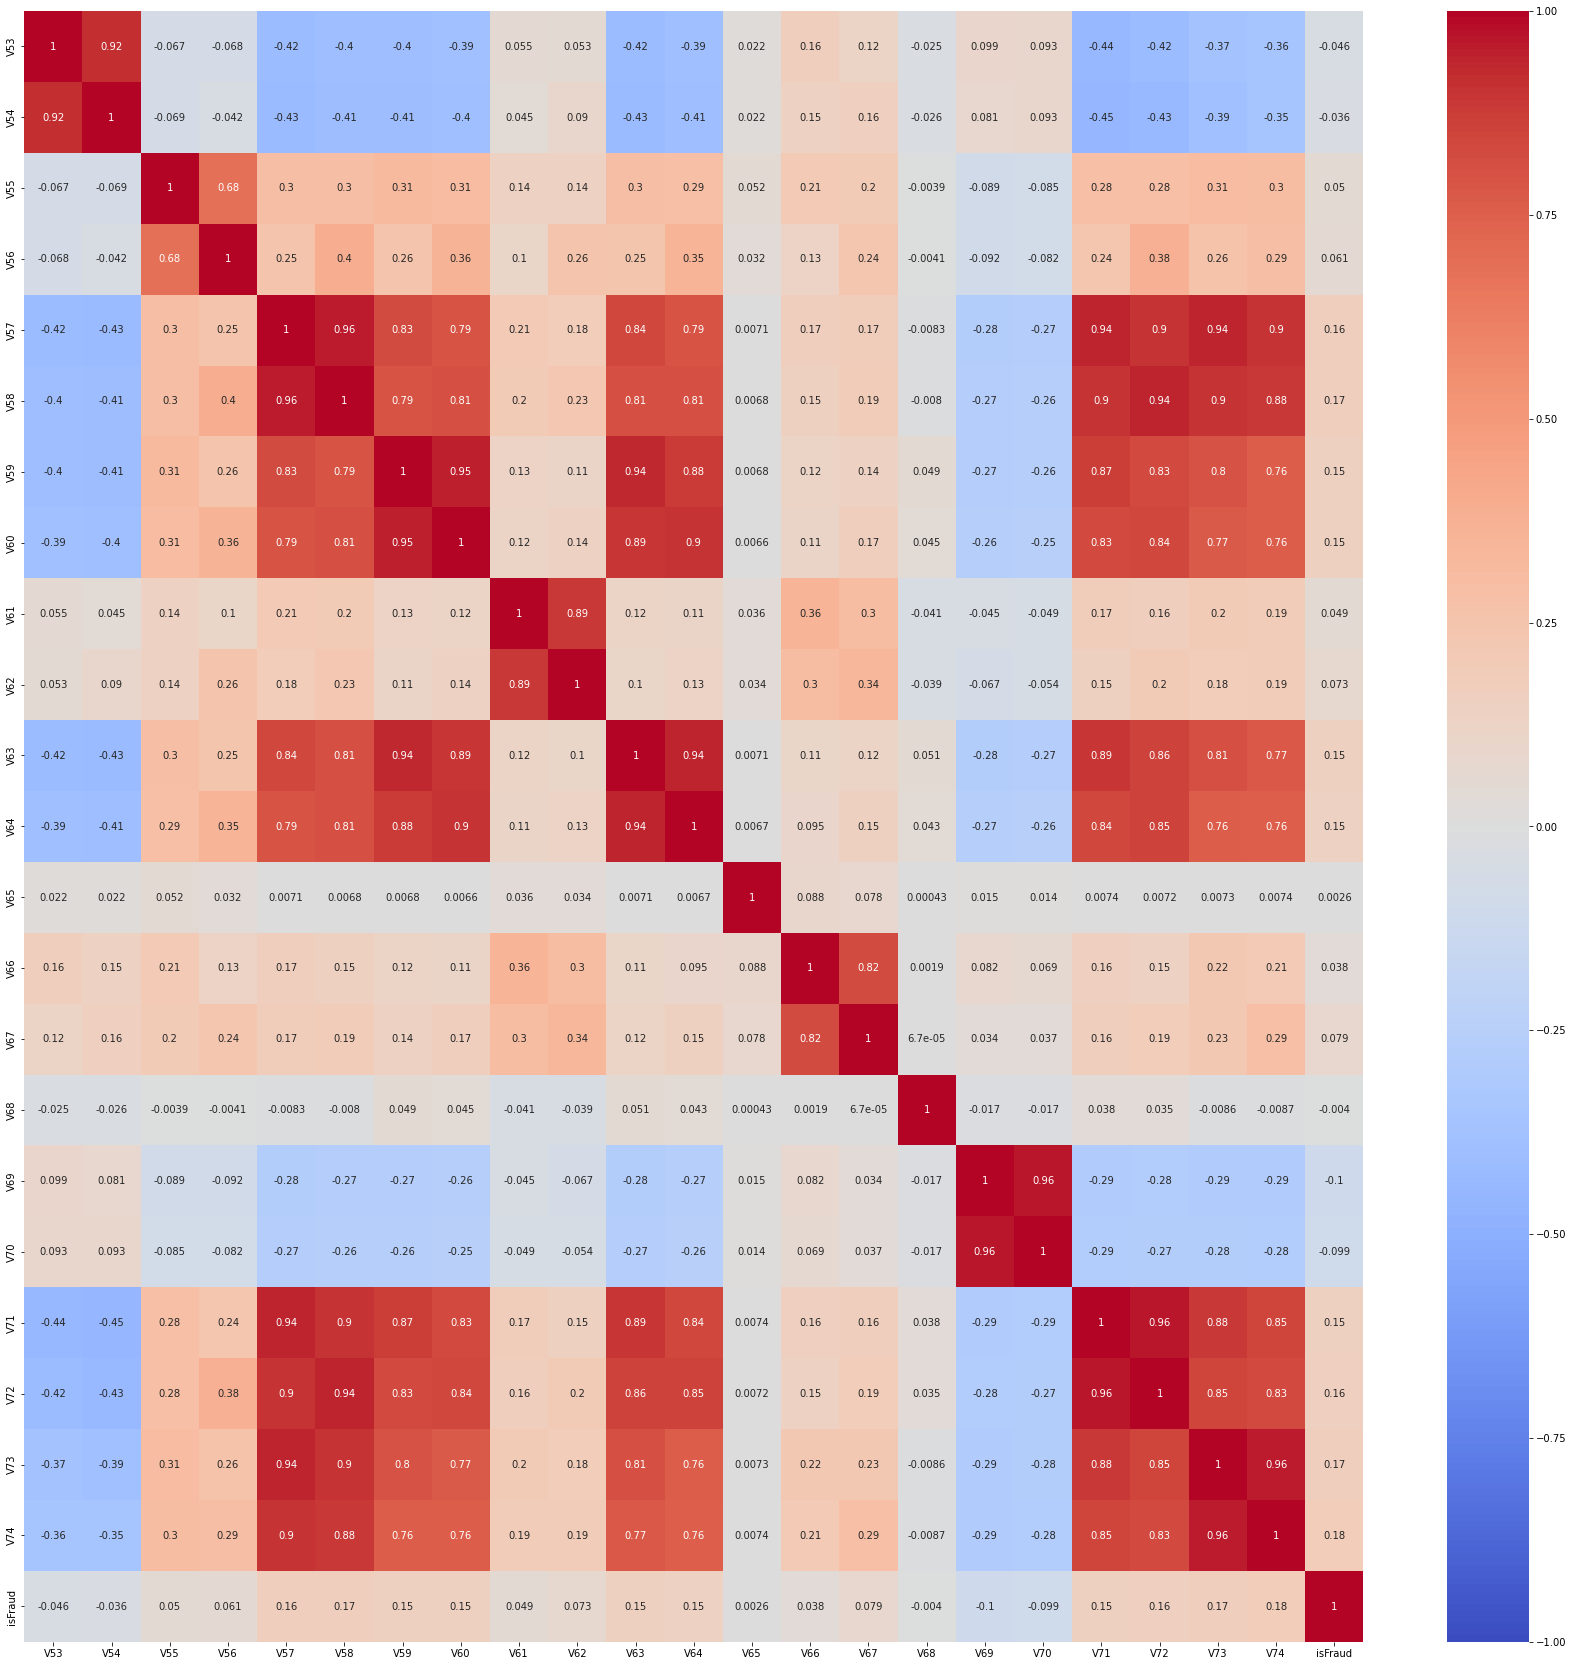

In [94]:
temp_array =[]
tempstr = "V"
for i in range(53,75):
    temp_array.append(tempstr+str(i))
temp_array.append("isFraud")
Vxxx_df = train_identity[temp_array]
plt.figure(figsize=(30,30))
sns.heatmap(Vxxx_df.corr(), vmin=-1, cmap="coolwarm", annot=True)
plt.show()

In [95]:
# we can drop the columns - V54,V57,V58,V60,V63,V64,V70,V71,V72,V73

In [96]:
train_identity.drop(axis="columns",labels=["V54","V57","V58","V71","V72","V73","V60","V63","V64","V70"],inplace=True)
test_identity.drop(axis="columns",labels=["V54","V57","V58","V71","V72","V73","V60","V63","V64","V70"],inplace=True)

In [97]:
train_identity["V53"].describe()

count    376749.000000
mean          0.577209
std           0.511998
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           5.000000
Name: V53, dtype: float64

In [98]:
temp_array.remove("isFraud")

In [99]:
labels=["V54","V57","V58","V71","V72","V73","V60","V63","V64","V70"]
for i in temp_array:
    if i not in labels:
        train_identity[i].fillna(train_identity[i].median(),inplace=True)
        test_identity[i].fillna(test_identity[i].median(),inplace=True)

Next we have V75-V94 with 65701 null values.

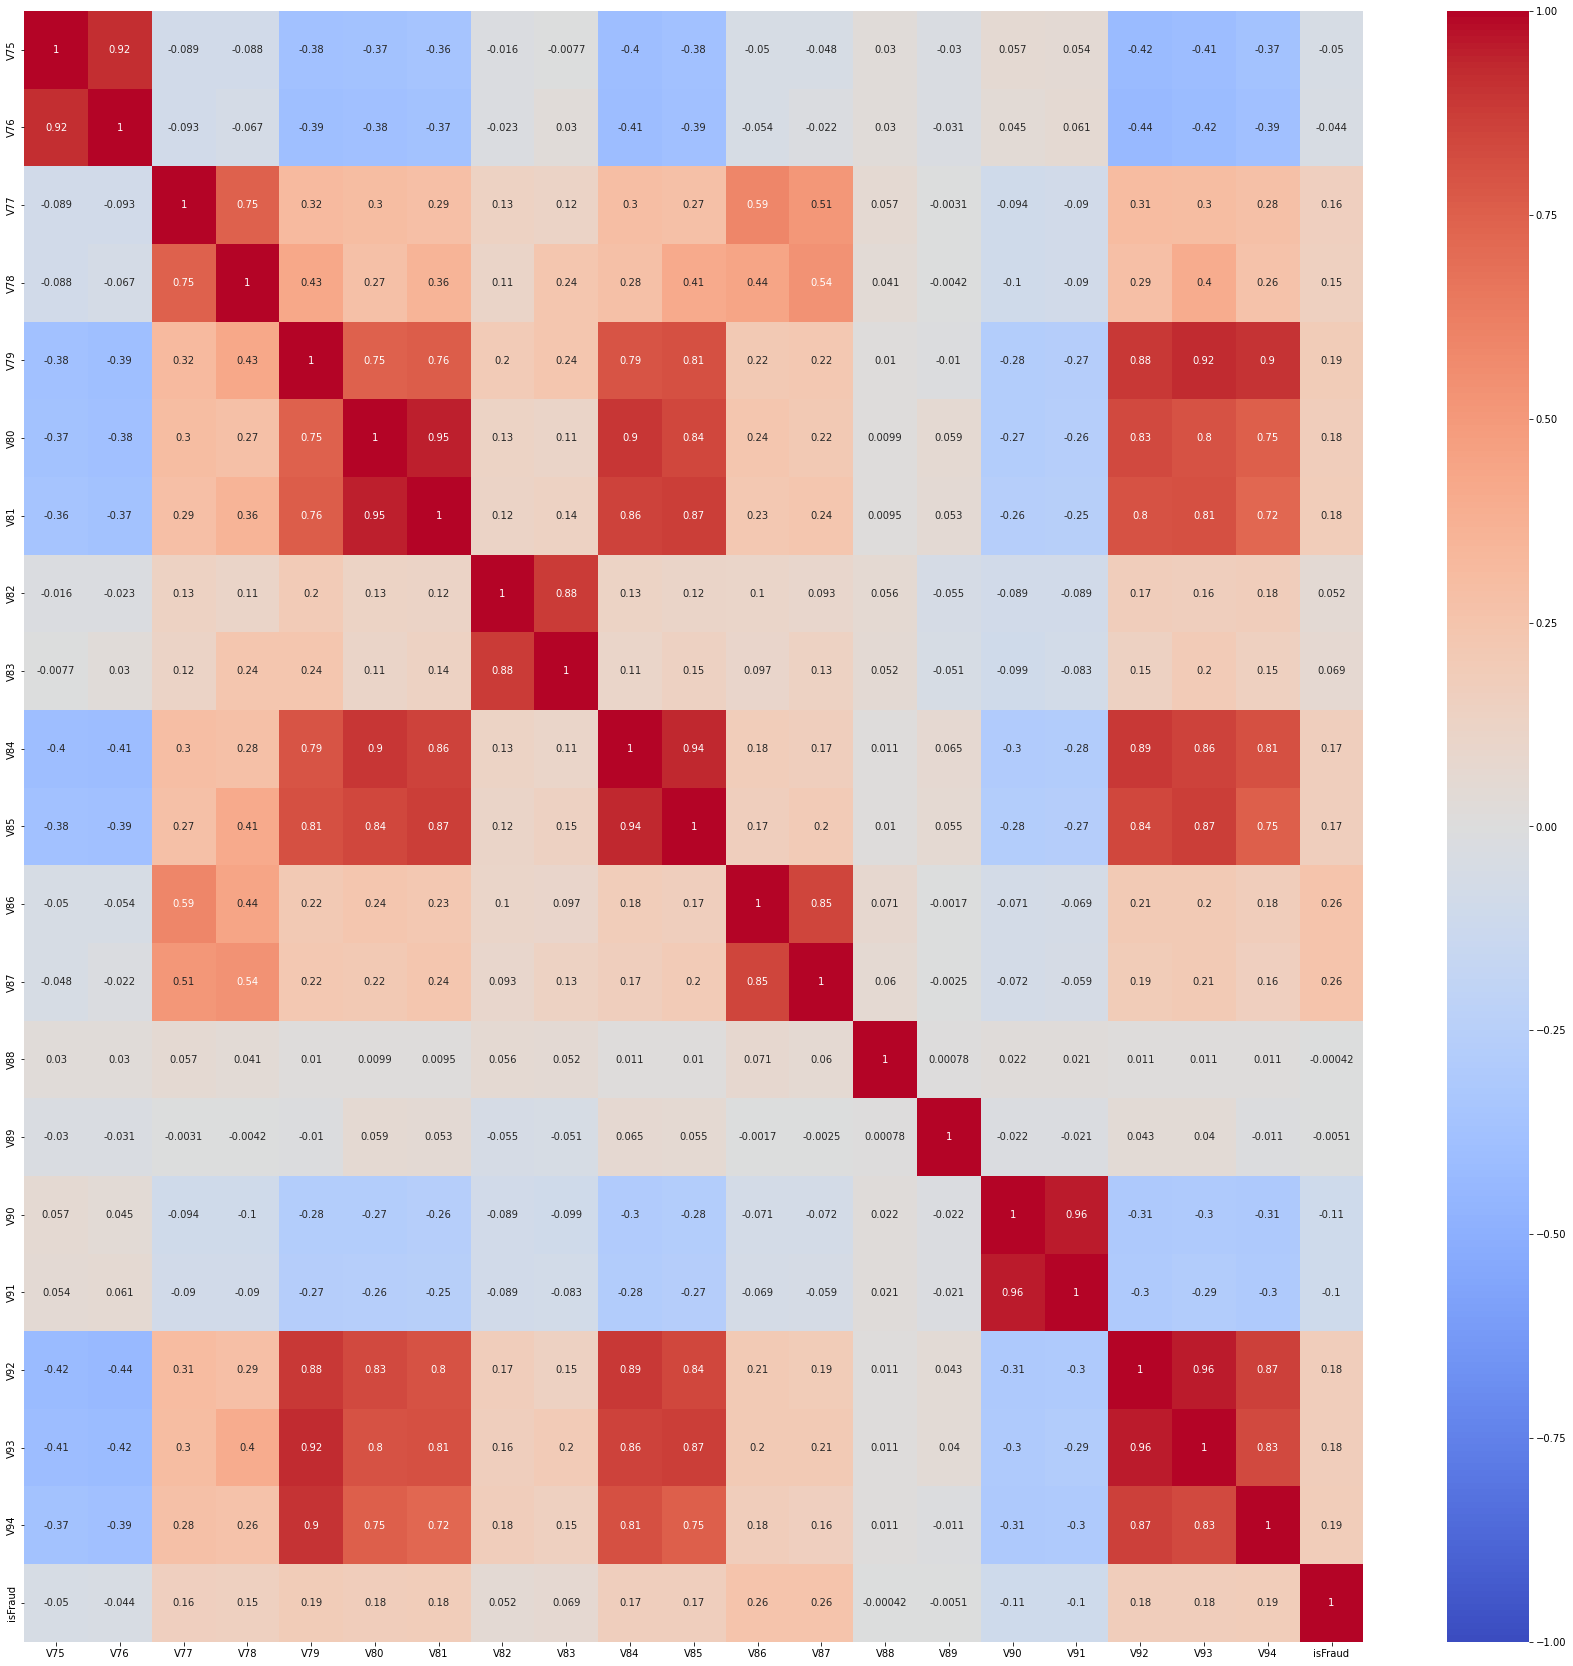

In [100]:
temp_array =[]
tempstr = "V"
for i in range(75,95):
    temp_array.append(tempstr+str(i))
temp_array.append("isFraud")
Vxxx_df = train_identity[temp_array]
plt.figure(figsize=(30,30))
sns.heatmap(Vxxx_df.corr(), vmin=-1, cmap="coolwarm", annot=True)
plt.show()

In [101]:
# we can drop the columns - V76,V79,V81,V82,V85,V91,V92,V93,V94

In [102]:
train_identity.drop(axis="columns",labels=["V76","V79","V81","V82","V85","V91","V92","V94","V93"],inplace=True)
test_identity.drop(axis="columns",labels=["V76","V79","V81","V82","V85","V91","V92","V94","V93"],inplace=True)

In [103]:
temp_array.remove("isFraud")
labels=["V76","V79","V81","V82","V85","V91","V92","V94","V93"]
for i in temp_array:
    if i not in labels:
        train_identity[i].fillna(train_identity[i].median(),inplace=True)
        test_identity[i].fillna(train_identity[i].median(),inplace=True)

In [104]:
train_identity.columns.get_loc('V95')

97

In [105]:
train_identity.columns.get_loc('V339')

341

Within these columns, we drop the ones which have greater than 75% null values.

In [106]:
train_identity.shape

(433584, 382)

In [107]:
thresh = 433584*0.75

In [108]:
for i in train_identity.columns[97:342]:
    # we are iterating through all the remaining columns of the type Vxxx.
    if(train_identity[i].isna().sum()>thresh):
        train_identity.drop(axis="columns",labels=i,inplace=True)
        test_identity.drop(axis="columns",labels=i,inplace=True)
    

In [109]:
train_identity.shape

(433584, 223)

Let's take a look at the overall null values for the remaining columns.

In [110]:
train_identity.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2                  0
card3                  0
card4                  0
card5                  0
card6                  0
addr1                  0
addr2                  0
dist1             258616
P_emaildomain      69545
R_emaildomain     332307
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                     0
D4                124319
D10                    0
D15                    0
M1                199685
M2                199685
M3                199685
M4                206790
M5                257537
M6                124993


Now we look at some of the categorical columns.

In [111]:
train_identity_cat.columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'],
      dtype='object')

In [112]:
train_identity["DeviceType"].value_counts()

desktop    63158
mobile     40939
Name: DeviceType, dtype: int64

<AxesSubplot:>

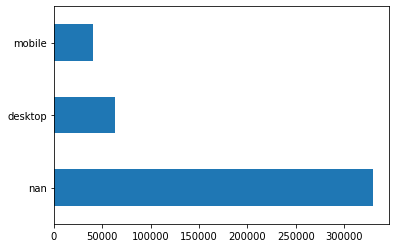

In [113]:
train_identity["DeviceType"].value_counts(dropna=False).plot(kind='barh')

Let's see if the fraud transactions are in any way dependent on whether the device is mobile or desktop

In [114]:
mobile_fraud=[]
desktop_fraud=[]
for i in train_identity.index:
    if (train_identity["DeviceType"][i]=='mobile' and train_identity["isFraud"][i]==1):
        mobile_fraud.append(i)
    elif(train_identity["DeviceType"][i]=='desktop' and train_identity["isFraud"][i]==1):
        desktop_fraud.append(i)

In [115]:
langs = ['mobile_fraud','desktop_fraud']
students = [len(mobile_fraud),len(desktop_fraud)]

<BarContainer object of 2 artists>

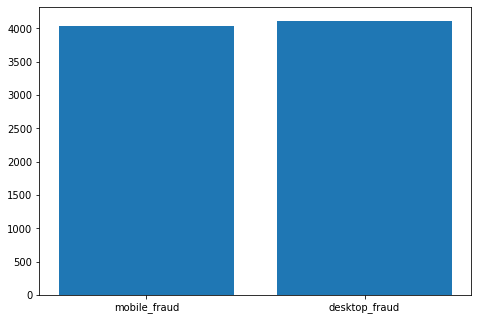

In [116]:
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(langs,students)

Percentage of fraud transactions done through mobile vs desktop would give us a better idea

In [117]:
train_identity["DeviceType"].value_counts()

desktop    63158
mobile     40939
Name: DeviceType, dtype: int64

<BarContainer object of 2 artists>

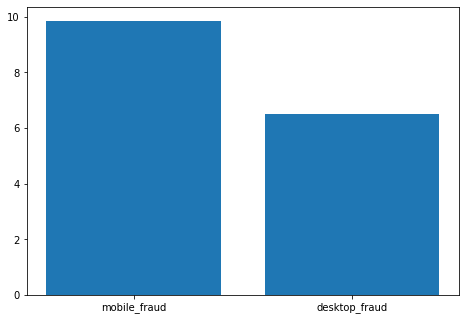

In [118]:
students = [(len(mobile_fraud)/40939)*100,(len(desktop_fraud)/63158)*100]
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(langs,students)

Hence we can see that mobile transactions are more likely to be fraud than desktop

In [119]:
train_identity["DeviceType"].fillna('unknown',inplace=True)

In [120]:
test_identity["DeviceType"].fillna('unknown',inplace=True)

In [121]:
train_identity["DeviceType"].isna().sum()

0

In [122]:
train_identity["DeviceInfo"].nunique()

1649

Since this is a lot of unique values and there are also many null values in this column, we can group most of these columns and make a new column for the NULL values.

In [123]:
def setDevice(df):
    df['DeviceInfo'] = df['DeviceInfo'].fillna('unknown_device').str.lower()
    
    df['device_name'] = df['DeviceInfo'].str.split('/', expand=True)[0]

    df.loc[df['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
    df.loc[df['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
    df.loc[df['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
    df.loc[df['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
    df.loc[df['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
    df.loc[df['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
    df.loc[df['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
    df.loc[df['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
    df.loc[df['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
    df.loc[df['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
    df.loc[df['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
    df.loc[df['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
    df.loc[df['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
    df.loc[df['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
    df.loc[df['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
    df.loc[df['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
    df.loc[df['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'

    df.loc[df.device_name.isin(df.device_name.value_counts()[df.device_name.value_counts() < 200].index), 'device_name'] = "Others"
    df['had_id'] = 1
    
    return df

In [124]:
train_identity = setDevice(train_identity)

In [125]:
test_identity = setDevice(test_identity)

In [126]:
train_identity["device_name"].value_counts()

unknown_device    345752
windows            35426
ios device         14615
Others             14611
macos               9334
trident             5542
RV                  3291
Motorola            2172
sm-j700m build       468
sm-g610m build       378
sm-g531h build       307
sm-g955u build       285
sm-g950u build       266
sm-g935f build       253
ale-l23 build        237
sm-g532m build       230
sm-g950f build       214
sm-g930v build       203
Name: device_name, dtype: int64

In [127]:
train_identity["DeviceInfo"].isna().sum()

0

In [128]:
train_identity["device_name"].isna().sum()
train_identity.drop(axis="columns",labels="DeviceInfo",inplace=True)
test_identity.drop(axis="columns",labels="DeviceInfo",inplace=True)

So we have dealt with all the missing values of DeviceInfo as well as DeviceType columns

Let's take a look at the id columns.

In [129]:
# Lets take all the id columns seperately
temp_array =[]
tempstr = "id"
for i in range(1,39):
    if(i<10):
        temp_array.append(tempstr+"_"+str(0)+str(i))
    else:
        temp_array.append(tempstr+"_"+str(i))
#temp_array.append("isFraud")
id_df = train_identity[temp_array]

In [130]:
# we can drop the columns with more than 90% null values.
percent_missing = id_df.isnull().sum() * 100 / len(id_df)
nullpercent_df = pd.DataFrame({'column_name': id_df.columns,
                                 'percent_missing': percent_missing})
nullpercent_df.sort_values('percent_missing', inplace=True)

In [131]:
nullpercent_df

,column_name,percent_missing
id_01,id_01,75.404996
id_12,id_12,75.404996
id_36,id_36,75.961059
id_35,id_35,75.961059
id_37,id_37,75.961059
id_15,id_15,75.961059
id_38,id_38,75.961059
id_29,id_29,75.962674
id_11,id_11,75.962674
id_28,id_28,75.962674


In [132]:
for i in range(0,len(nullpercent_df["column_name"])):
    if (nullpercent_df["percent_missing"][i]>90):
        print(nullpercent_df["column_name"][i])
        train_identity.drop(axis="columns",labels=nullpercent_df["column_name"][i],inplace=True)
        test_identity.drop(axis="columns",labels=nullpercent_df["column_name"][i],inplace=True)

id_18
id_23
id_22
id_27
id_26
id_21
id_07
id_08
id_25
id_24


In the categorical columns of id, only id_23 and id_27 are removed based on the 90% condition, we anaylze the rest of them.

In [133]:
train_identity["id_12"].value_counts()

NotFound    90874
Found       15766
Name: id_12, dtype: int64

We can add a new type of unkown_status and replace all the null values with this

In [134]:
train_identity["id_12"].fillna('Unknown_status',inplace=True)
test_identity["id_12"].fillna('Unknown_status',inplace=True)

In [135]:
train_identity["id_15"].value_counts()

Found      50243
New        45394
Unknown     8592
Name: id_15, dtype: int64

In [136]:
train_identity["id_15"].fillna('NotFound',inplace=True)
test_identity["id_15"].fillna('NotFound',inplace=True)

In [137]:
train_identity["id_16"].value_counts()

Found       49191
NotFound    46446
Name: id_16, dtype: int64

In [138]:
train_identity["id_16"].fillna('Unknown_status',inplace=True)
test_identity["id_16"].fillna('Unknown_status',inplace=True)

In [139]:
train_identity["id_28"].value_counts()

Found    56539
New      47683
Name: id_28, dtype: int64

In [140]:
train_identity["id_28"].fillna('Unknown_status',inplace=True)
test_identity["id_28"].fillna('Unknown_status',inplace=True)

In [141]:
train_identity["id_29"].value_counts()

Found       55561
NotFound    48661
Name: id_29, dtype: int64

In [142]:
train_identity["id_29"].fillna('Unknown_status',inplace=True)
test_identity["id_29"].fillna('Unknown_status',inplace=True)

In [143]:
train_identity["id_30"].value_counts()

Windows 10          15686
Windows 7            9727
iOS 11.1.2           2769
iOS 11.2.1           2746
Android 7.0          2114
Mac OS X 10_12_6     1859
Mac OS X 10_11_6     1765
iOS 11.3.0           1443
Windows 8.1          1431
Mac OS X 10_10_5     1230
iOS 11.2.6           1211
iOS 10.3.3           1176
Mac OS X 10_13_2     1047
iOS 11.2.5            894
Mac OS X 10_13_1      887
Linux                 826
Android               796
iOS 11.2.2            661
iOS 11.2.0            643
Mac OS X 10_13_3      641
Mac OS X 10_13_4      562
iOS 11.1.1            511
iOS 11.0.3            485
Android 7.1.1         467
Mac OS X 10_9_5       432
Android 6.0.1         414
iOS 10.3.2            337
iOS 9.3.5             304
Android 8.0.0         257
Android 5.1.1         244
Mac                   226
iOS 10.2.1            205
Mac OS X 10.13        201
iOS                   196
iOS 11.1.0            188
Windows Vista         186
Mac OS X 10.12        176
iOS 10.3.1            167
Mac OS X 10_

In [144]:
train_identity["id_30"].fillna('Unknown_status',inplace=True)
test_identity["id_30"].fillna('Unknown_status',inplace=True)

In [145]:
train_identity["id_31"].value_counts()

chrome 63.0                       16310
mobile safari 11.0                 9866
mobile safari generic              8476
ie 11.0 for desktop                6770
safari generic                     6031
chrome 62.0                        5347
chrome 65.0                        5014
chrome 64.0                        4963
chrome 63.0 for android            4263
chrome generic                     3525
chrome 66.0                        3170
edge 16.0                          3115
chrome 64.0 for android            2509
firefox 57.0                       2477
chrome 65.0 for android            2415
mobile safari 10.0                 2069
chrome 66.0 for android            1707
chrome 62.0 for android            1571
edge 15.0                          1226
chrome generic for android          882
firefox 59.0                        803
samsung browser 6.2                 779
firefox 58.0                        616
chrome 49.0                         537
firefox                             515


In [146]:
train_identity["id_31"].fillna('Unknown_status',inplace=True)
test_identity["id_31"].fillna('Unknown_status',inplace=True)

In [147]:
train_identity["id_33"].value_counts()

1920x1080    12551
1366x768      6382
1334x750      4775
2208x1242     3578
1440x900      3216
1600x900      2575
2048x1536     2558
2560x1600     1565
1280x800      1542
2560x1440     1393
2880x1800     1322
1136x640      1286
1680x1050     1278
1280x1024     1272
2436x1125     1082
1280x720       983
1920x1200      772
2001x1125      770
1024x768       609
2220x1080      406
5120x2880      288
3360x2100      276
2732x2048      268
1366x767       251
3840x2160      194
2736x1824      181
855x480        175
1360x768       167
2224x1668      154
4096x2304      146
2220x1081      135
2160x1440      135
2961x1442      116
3200x1800       98
2562x1442       78
2560x1080       74
1600x1200       71
1280x768        70
1280x1025       61
1152x864        60
1024x600        60
3000x2000       58
3440x1440       56
2400x1350       48
2672x1440       48
960x540         43
801x480         43
1919x1079       39
1365x768        38
2048x1152       37
1536x864        34
1919x1080       34
1920x1281   

In [148]:
train_identity["id_33"].fillna('Unknown_status',inplace=True)
test_identity["id_33"].fillna('Unknown_status',inplace=True)

In [149]:
train_identity["id_34"].value_counts()

match_status:2     44454
match_status:1     12848
match_status:0       304
match_status:-1        3
Name: id_34, dtype: int64

In [150]:
test_identity["id_34"].value_counts()

match_status:2    15025
match_status:1     4404
match_status:0      107
Name: id_34, dtype: int64

test_identity does not have a match status of -1 so we can drop from the train one later as it has only 3 such instances.

In [151]:
train_identity["id_34"].fillna('Unknown_status',inplace=True)
test_identity["id_34"].fillna('Unknown_status',inplace=True)

In [152]:
train_identity["id_35"].value_counts()

T    57614
F    46615
Name: id_35, dtype: int64

In [153]:
train_identity["id_35"].fillna('Unknown_status',inplace=True)
test_identity["id_35"].fillna('Unknown_status',inplace=True)

In [154]:
train_identity["id_36"].value_counts()

F    99067
T     5162
Name: id_36, dtype: int64

In [155]:
train_identity["id_36"].fillna('Unknown_status',inplace=True)
test_identity["id_36"].fillna('Unknown_status',inplace=True)

In [156]:
train_identity["id_37"].value_counts()

T    81698
F    22531
Name: id_37, dtype: int64

In [157]:
train_identity["id_37"].fillna('Unknown_status',inplace=True)
test_identity["id_37"].fillna('Unknown_status',inplace=True)

In [158]:
train_identity["id_38"].value_counts()

F    54350
T    49879
Name: id_38, dtype: int64

In [159]:
train_identity["id_38"].fillna('Unknown_status',inplace=True)
test_identity["id_38"].fillna('Unknown_status',inplace=True)

Now that we are done with the categorical ones, we look at the remaining numerical columns.

In [160]:
train_identity.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2                  0
card3                  0
card4                  0
card5                  0
card6                  0
addr1                  0
addr2                  0
dist1             258616
P_emaildomain      69545
R_emaildomain     332307
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                     0
D4                124319
D10                    0
D15                    0
M1                199685
M2                199685
M3                199685
M4                206790
M5                257537
M6                124993


In [161]:
train_identity["id_01"].describe()

count    106640.000000
mean        -10.139291
std          14.354188
min        -100.000000
25%         -10.000000
50%          -5.000000
75%          -5.000000
max           0.000000
Name: id_01, dtype: float64

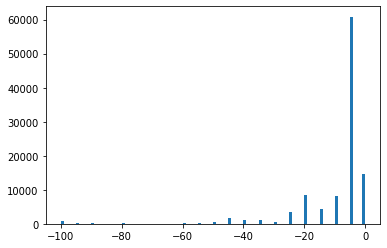

In [162]:
plt.hist(train_identity["id_01"],bins=100)
plt.show()

In [163]:
train_identity["id_02"].describe()

count    104146.000000
mean     174306.709965
std      159164.353535
min           1.000000
25%       67749.000000
50%      125714.500000
75%      228021.250000
max      999595.000000
Name: id_02, dtype: float64

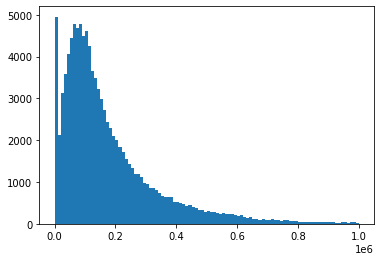

In [164]:
plt.hist(train_identity["id_02"],bins=100)
plt.show()

In [165]:
train_identity["id_03"].describe()

count    49191.000000
mean         0.058710
std          0.599425
min        -13.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: id_03, dtype: float64

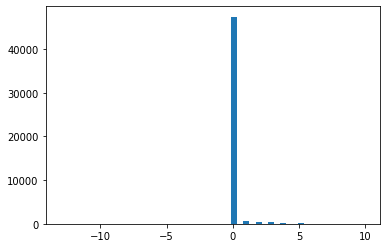

In [166]:
plt.hist(train_identity["id_03"],bins=50)
plt.show()

In [167]:
train_identity["id_04"].describe()

count    49191.000000
mean        -0.059198
std          0.704466
min        -28.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: id_04, dtype: float64

In [168]:
train_identity_cat.columns[14:29]

Index(['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38'],
      dtype='object')

<AxesSubplot:>

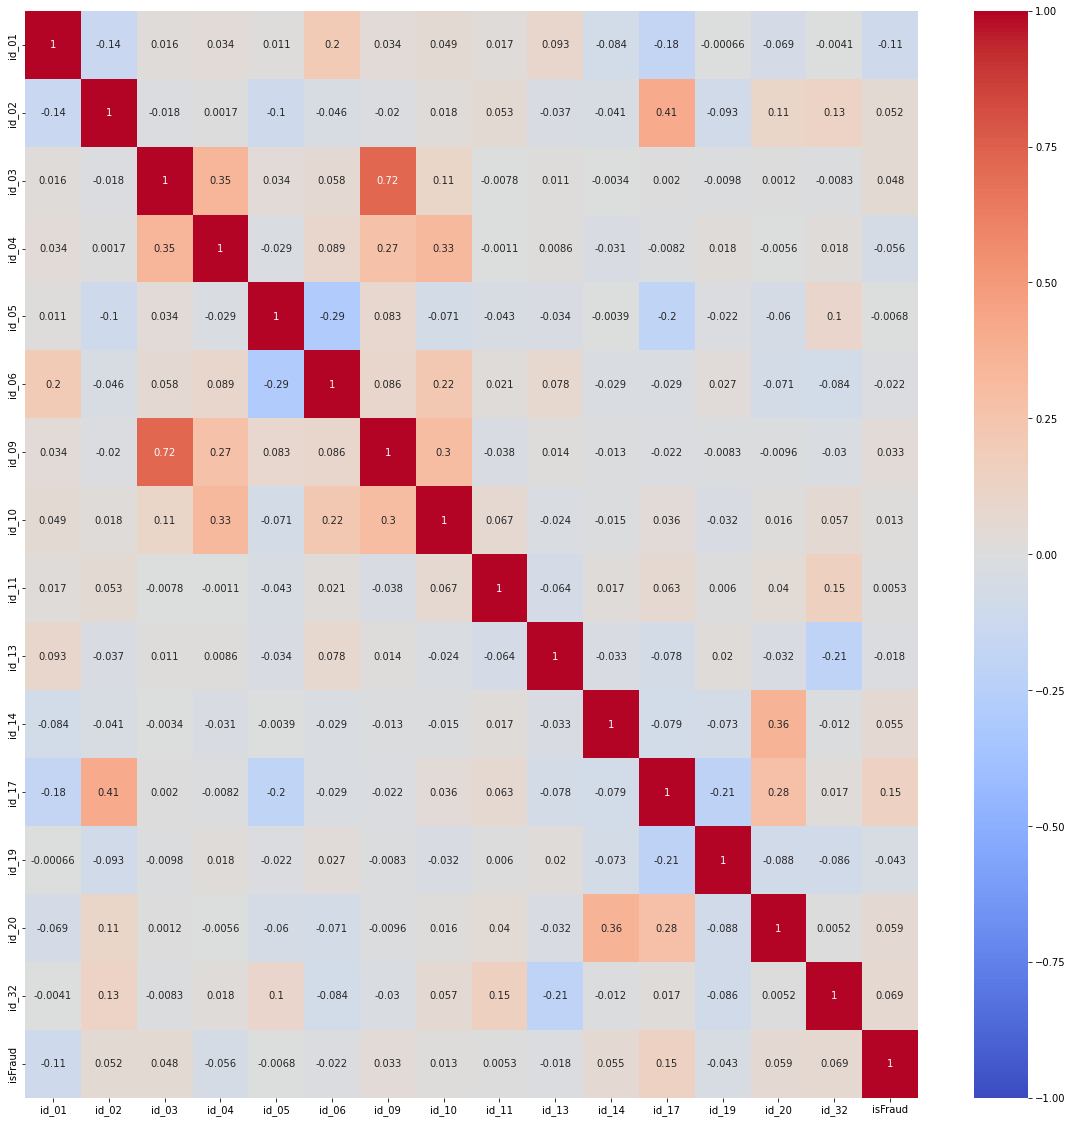

In [169]:
temp_array = ["id_01","id_02","id_03","id_04","id_05","id_06","id_09","id_10","id_11","id_12","id_13","id_14","id_15","id_16","id_17","id_19","id_20","id_28","id_29","id_30","id_31","id_32","id_33","id_34","id_35","id_36","id_37","id_38"]
temp_array.append("isFraud")
id_df = train_identity[temp_array]
id_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(id_df.corr(), vmin=-1, cmap="coolwarm", annot=True)

In [170]:
train_identity.drop(axis='columns',labels=["id_05","id_11"],inplace=True)
test_identity.drop(axis='columns',labels=["id_05","id_11"],inplace=True)

In [171]:
train_identity['id_02' + '_imp'] = train_identity['id_02']
train_identity = random_imputation(train_identity, 'id_02')
test_identity['id_02' + '_imp'] = test_identity['id_02']
test_identity = random_imputation(test_identity, 'id_02')

In [172]:
train_identity.columns[train_identity.isna().any()]

Index(['dist1', 'P_emaildomain', 'R_emaildomain', 'D4', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'id_01', 'id_02', 'id_03', 'id_04', 'id_06', 'id_09',
       'id_10', 'id_13', 'id_14', 'id_17', 'id_19', 'id_20', 'id_32'],
      dtype='object')

In [173]:
anal_columns = ["D4","dist1","V1","V2","V3","V5","V6","V7","V8","V9","V10","id_01","id_02","id_03","id_04","id_06","id_09","id_10","id_13","id_14","id_17","id_19","id_20","id_32"]

In [174]:
for feature in anal_columns:
    train_identity[feature + '_imp'] = train_identity[feature]
    test_identity[feature + '_imp'] = test_identity[feature]
    train_identity = random_imputation(train_identity, feature)
    test_identity = random_imputation(test_identity,feature)

In [175]:
test_identity.isna().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               2229
card3                384
card4                386
card5               1084
card6                386
addr1                  0
addr2                  0
dist1              87980
P_emaildomain      23525
R_emaildomain     113072
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                   334
D4                 42266
D10                    0
D15                    0
M1                 67718
M2                 67718
M3                 67718
M4                 70297
M5                 87741
M6                 42574
M7                 86421


In [176]:
train_identity.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2                  0
card3                  0
card4                  0
card5                  0
card6                  0
addr1                  0
addr2                  0
dist1             258616
P_emaildomain      69545
R_emaildomain     332307
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                     0
D4                124319
D10                    0
D15                    0
M1                199685
M2                199685
M3                199685
M4                206790
M5                257537
M6                124993


In [177]:
deter_data = pd.DataFrame(columns = ["Det" + name for name in anal_columns])
deter_data1 = pd.DataFrame(columns = ["Det" + name for name in anal_columns])
        
for feature in anal_columns:
    deter_data["Det" + feature] = train_identity[feature + "_imp"]
    deter_data1["Det" + feature] = test_identity[feature + "_imp"]
    parameters = list(set(train_identity.columns) - set(anal_columns) - {feature + '_imp'}-set(train_identity_cat.columns))
    parameters.remove('device_name')
    
    for i in train_identity.columns[train_identity.isna().any()]:
        if i in (train_identity_cat.columns):
            continue
        elif i in set(anal_columns):
            continue
        else:
            parameters.remove(i)
            
    parameters1 = list(set(test_identity.columns) - set(anal_columns) - {feature + '_imp'}-set(train_identity_cat.columns))
    parameters1.remove('device_name')
    
    for i in test_identity.columns[test_identity.isna().any()]:
        if i in (train_identity_cat.columns):
            continue
        elif i in set(anal_columns):
            continue
        else:
            parameters1.remove(i)
            
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = train_identity[parameters], y = train_identity[feature + '_imp'])

    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[train_identity[feature].isnull(), "Det" + feature] = model.predict(train_identity[parameters])[train_identity[feature].isnull()]
    parameters.remove('isFraud')
    model.fit(X = test_identity[parameters1], y = test_identity[feature + '_imp'])
    deter_data1.loc[test_identity[feature].isnull(), "Det" + feature] = model.predict(test_identity[parameters1])[test_identity[feature].isnull()]

<AxesSubplot:>

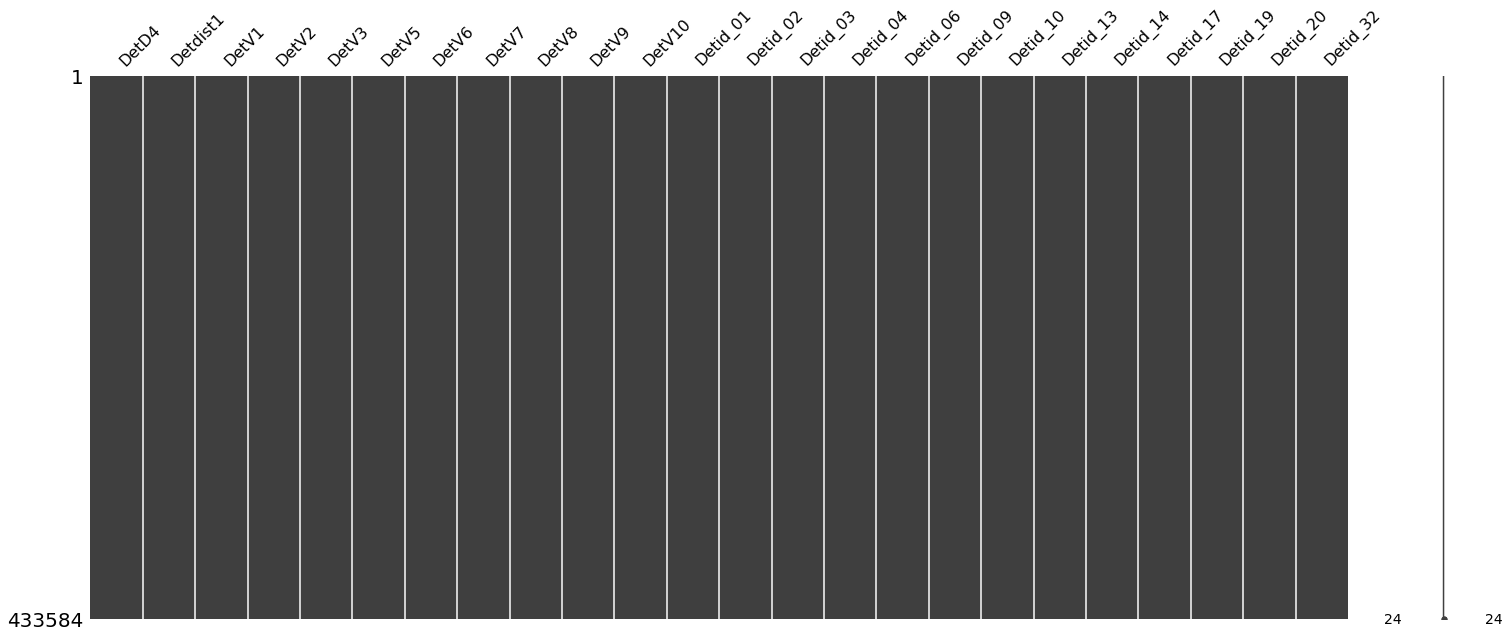

In [178]:
mno.matrix(deter_data)

<AxesSubplot:>

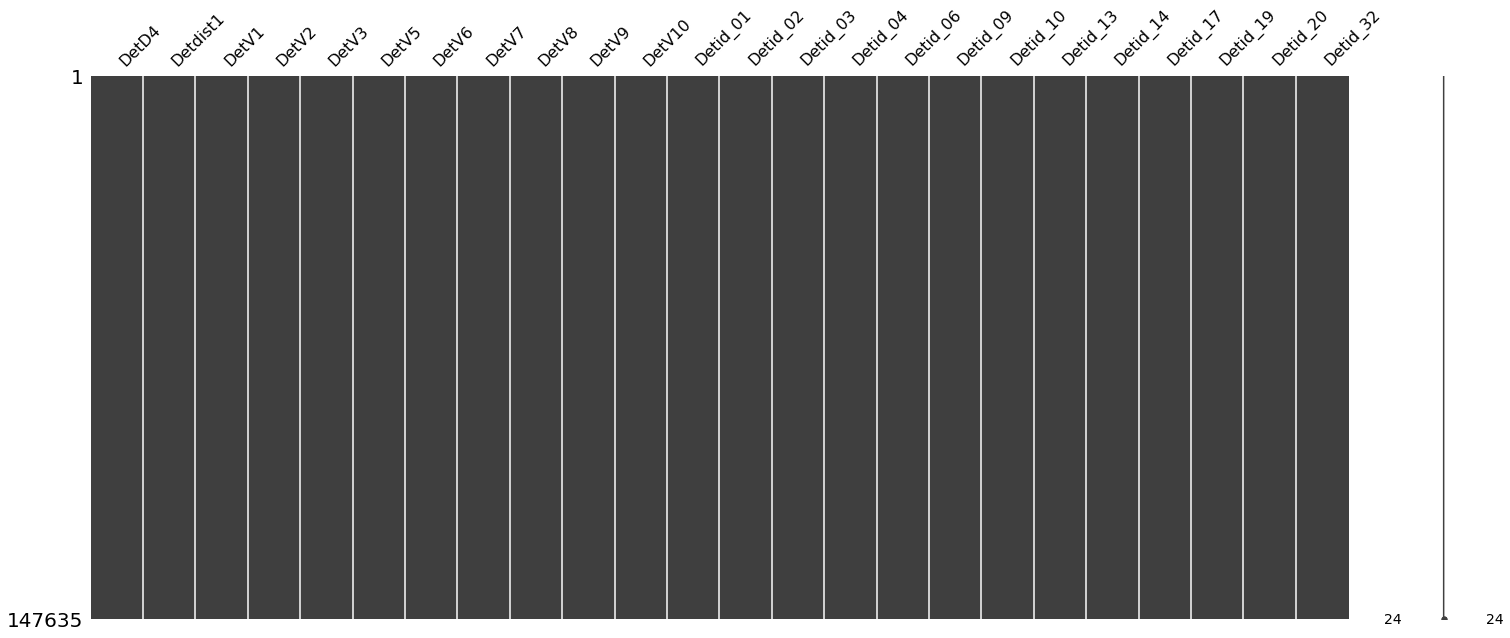

In [179]:
mno.matrix(deter_data1)

With this we have successfully implemented regression imputation to fill all the remaining continous columns which had moderate amount of null values. 

In [180]:
#now we fill the new data in those columns and remove the "_imp" ones.
for feature in anal_columns:
    train_identity[feature] = train_identity[feature + '_imp']
    test_identity[feature] = test_identity[feature + '_imp']
    train_identity.drop(axis="columns",labels=feature+'_imp',inplace=True)
    test_identity.drop(axis="columns",labels=feature+'_imp',inplace=True)

Let's look at the categorical columns which have null values in them. Consider P_emaildomain and R_emaildomain which give us info about purchaser and recipient email domain respectively.

In [181]:
train_identity["P_emaildomain"].value_counts()

gmail.com           167144
yahoo.com            74304
hotmail.com          33408
anonymous.com        27089
aol.com              20902
comcast.net           5712
icloud.com            4620
outlook.com           3704
msn.com               2998
att.net               2990
live.com              2258
sbcglobal.net         2126
verizon.net           1982
ymail.com             1729
bellsouth.net         1415
yahoo.com.mx          1151
me.com                1106
cox.net               1032
optonline.net          738
charter.net            612
live.com.mx            558
rocketmail.com         463
mail.com               412
earthlink.net          368
gmail                  352
mac.com                339
outlook.es             328
aim.com                246
juno.com               241
roadrunner.com         233
windstream.net         231
hotmail.es             230
hotmail.fr             208
embarqmail.com         206
frontier.com           200
twc.com                175
netzero.com            174
w

We can fill the null values with a none/unknown which denotes that email was not required/provided during the transaction.

In [182]:
train_identity["P_emaildomain"].fillna("none",inplace=True)

In [183]:
test_identity["P_emaildomain"].fillna("none",inplace=True)

In [184]:
train_identity["R_emaildomain"].describe()

count        101277
unique           60
top       gmail.com
freq          42218
Name: R_emaildomain, dtype: object

This column has significantly more null values compared to P_emaildomain, this is beacuse not all transactions need a recipient. Hence, similar to before we can replace the null values with "none".

In [185]:
train_identity["R_emaildomain"].fillna("none",inplace=True)

In [186]:
test_identity["R_emaildomain"].fillna("none",inplace=True)

Now, let's look at the M columns.

In [187]:
train_identity["M1"].describe()

count     233899
unique         2
top            T
freq      233881
Name: M1, dtype: object

In [188]:
# we can replace the null values with unknown.
for i in range(1,10):
    train_identity["M"+str(i)].fillna("unknown",inplace=True)
    test_identity["M"+str(i)].fillna("unknown",inplace=True)

In [189]:
train_identity.isna().sum()

TransactionID     0
isFraud           0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
card2             0
card3             0
card4             0
card5             0
card6             0
addr1             0
addr2             0
dist1             0
P_emaildomain     0
R_emaildomain     0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                0
C8                0
C9                0
C10               0
C11               0
C12               0
C13               0
C14               0
D1                0
D4                0
D10               0
D15               0
M1                0
M2                0
M3                0
M4                0
M5                0
M6                0
M7                0
M8                0
M9                0
V1                0
V2                0
V3                0
V5                0
V6                0
V7                0
V8                0


In [190]:
train_identity["TransactionAmt"].describe()

count    433584.000000
mean        134.394722
std         230.747327
min           0.251000
25%          43.500000
50%          68.500000
75%         125.000000
max        6085.230000
Name: TransactionAmt, dtype: float64

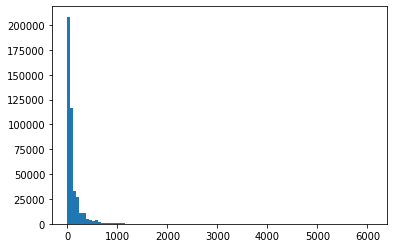

In [191]:
plt.hist(train_identity["TransactionAmt"],bins=100)
plt.show()

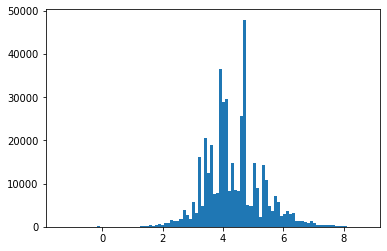

In [192]:
testskew = np.log(train_identity["TransactionAmt"])
plt.hist(testskew,bins=100)
plt.show()

In [193]:
train_identity["TransactionDT"][2]

10713596

Now we do encoding (label or one-hot) depending on the number of unique values in the categorical column.

In [194]:
train_identity_cat=train_identity.select_dtypes(include=['object'])

In [195]:
train_identity_cat.columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'DeviceType', 'device_name'],
      dtype='object')

In [196]:
for i in train_identity_cat.columns:
    print(i,train_identity[i].nunique())

ProductCD 5
card4 4
card6 4
P_emaildomain 60
R_emaildomain 61
M1 3
M2 3
M3 3
M4 4
M5 3
M6 3
M7 3
M8 3
M9 3
id_12 3
id_15 4
id_16 3
id_28 3
id_29 3
id_30 76
id_31 127
id_33 242
id_34 5
id_35 3
id_36 3
id_37 3
id_38 3
DeviceType 3
device_name 18


In [197]:
train_identity["P_emaildomain"].value_counts()

gmail.com           167144
yahoo.com            74304
none                 69545
hotmail.com          33408
anonymous.com        27089
aol.com              20902
comcast.net           5712
icloud.com            4620
outlook.com           3704
msn.com               2998
att.net               2990
live.com              2258
sbcglobal.net         2126
verizon.net           1982
ymail.com             1729
bellsouth.net         1415
yahoo.com.mx          1151
me.com                1106
cox.net               1032
optonline.net          738
charter.net            612
live.com.mx            558
rocketmail.com         463
mail.com               412
earthlink.net          368
gmail                  352
mac.com                339
outlook.es             328
aim.com                246
juno.com               241
roadrunner.com         233
windstream.net         231
hotmail.es             230
hotmail.fr             208
embarqmail.com         206
frontier.com           200
twc.com                175
n

In [198]:
from sklearn.preprocessing import LabelEncoder

In [199]:
train_identity_cat=train_identity.select_dtypes(include=['object'])

In [200]:
for i in train_identity_cat.columns:
    if(train_identity[i].nunique() > 5):
        label_encoder = LabelEncoder()
        train_identity[i] = label_encoder.fit_transform(train_identity[i])
        test_identity[i] = label_encoder.fit_transform(test_identity[i])
    else:
        train_identity = pd.get_dummies(train_identity, columns = [i])
        test_identity = pd.get_dummies(test_identity, columns = [i])

Now let's look at the skew of columns.

In [201]:
test_df = train_identity[["card1","card2","card3","card5"]]

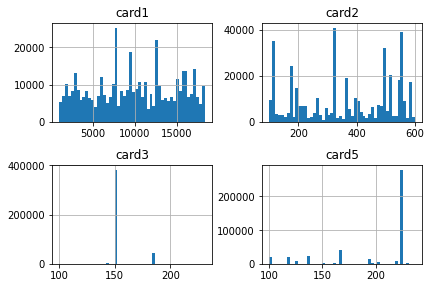

In [202]:
plt.hist = test_df.hist(bins=50)
plt.tight_layout(pad=0.7, w_pad=0.5, h_pad=1.0)
plt.show()

In [203]:
temp_arr = []
for i in range(1,15):
    temp_arr.append("C"+str(i))
    
test_df = train_identity[temp_arr]

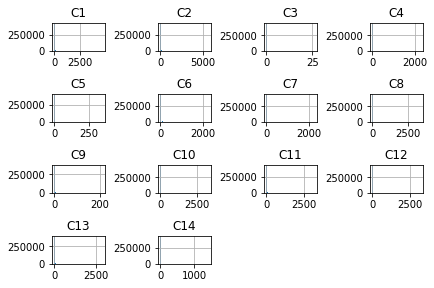

In [204]:
plt.hist = test_df.hist(bins=100)
plt.tight_layout(pad=0.7, w_pad=0.5, h_pad=1.0,)
plt.show()

STANDARDIZATION

In [205]:
train_identity_cat.columns

Index(['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1',
       'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'id_12', 'id_15',
       'id_16', 'id_28', 'id_29', 'id_30', 'id_31', 'id_33', 'id_34', 'id_35',
       'id_36', 'id_37', 'id_38', 'DeviceType', 'device_name'],
      dtype='object')

In [206]:
train_identity.isna().sum()

TransactionID             0
isFraud                   0
TransactionDT             0
TransactionAmt            0
card1                     0
card2                     0
card3                     0
card5                     0
addr1                     0
addr2                     0
dist1                     0
P_emaildomain             0
R_emaildomain             0
C1                        0
C2                        0
C3                        0
C4                        0
C5                        0
C6                        0
C7                        0
C8                        0
C9                        0
C10                       0
C11                       0
C12                       0
C13                       0
C14                       0
D1                        0
D4                        0
D10                       0
D15                       0
V1                        0
V2                        0
V3                        0
V5                        0
V6                  

In [207]:
train_identity.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_36_Unknown_status,id_37_F,id_37_T,id_37_Unknown_status,id_38_F,id_38_T,id_38_Unknown_status,DeviceType_desktop,DeviceType_mobile,DeviceType_unknown
0,3424175,0,11053717,49.00,5033,269.0,150.0,224.0,330.0,87.0,...,1,0,0,1,0,0,1,0,0,1
1,3206179,0,5150800,57.95,4527,376.0,150.0,226.0,441.0,87.0,...,1,0,0,1,0,0,1,0,0,1
2,3410455,0,10713596,115.95,2772,512.0,150.0,226.0,143.0,87.0,...,1,0,0,1,0,0,1,0,0,1
3,3058578,0,1611950,100.00,14290,512.0,150.0,226.0,177.0,87.0,...,0,0,1,0,0,1,0,1,0,0
4,3242131,0,6111087,95.00,12839,321.0,150.0,226.0,220.0,87.0,...,1,0,0,1,0,0,1,0,0,1


In [208]:
test_cols = list(set(train_identity.columns) - set(train_identity_cat.columns))

In [209]:
test_cols.remove("isFraud")

In [210]:
print(test_cols)

['V319', 'V290', 'V98', 'V115', 'id_34_match_status:1', 'id_09', 'V284', 'V135', 'V99', 'V65', 'C8', 'id_03', 'id_16_NotFound', 'M8_unknown', 'M1_T', 'V120', 'id_28_Unknown_status', 'V10', 'V289', 'V285', 'V19', 'id_15_Found', 'id_34_Unknown_status', 'V129', 'C10', 'V133', 'V26', 'V14', 'V77', 'M7_F', 'V61', 'V40', 'V106', 'V318', 'V320', 'id_16_Found', 'V75', 'D15', 'V8', 'V127', 'V283', 'V117', 'V101', 'C6', 'M8_F', 'TransactionDT', 'V24', 'V108', 'M3_T', 'C4', 'card4_mastercard', 'id_37_F', 'V123', 'V279', 'V307', 'V317', 'id_16_Unknown_status', 'id_15_Unknown', 'V88', 'V45', 'V294', 'V23', 'V43', 'TransactionAmt', 'id_29_NotFound', 'V305', 'V128', 'V100', 'V55', 'V87', 'id_28_New', 'V300', 'id_17', 'V109', 'M4_M2', 'id_36_T', 'id_38_T', 'M4_M0', 'V313', 'V299', 'M4_unknown', 'M1_F', 'id_15_NotFound', 'card6_debit or credit', 'id_37_Unknown_status', 'D4', 'V103', 'V104', 'V80', 'V96', 'V137', 'card3', 'V304', 'V53', 'V134', 'C11', 'V47', 'V297', 'V321', 'V281', 'id_36_F', 'V5', 'V31

In [211]:
# def standardize(X):
#     mean =  X.mean(0)
#     sd = X.std(0)
#     return (X-mean)/sd
test_df = train_identity[test_cols]
test_df = (test_df - test_df.mean())/test_df.std()


In [212]:
test_df.head()

,V319,V290,V98,V115,id_34_match_status:1,id_09,V284,V135,V99,V65,...,V292,id_12_Unknown_status,id_01,id_38_Unknown_status,V38,V35,V59,V293,V102,M2_unknown
0,-0.053471,-0.189972,-0.217256,-0.170572,-0.174748,-0.095178,-0.262080,-0.057488,0.404527,0.017843,...,-0.248185,0.571114,0.359262,0.562551,-0.157541,-1.392909,-0.330451,-0.045289,-0.05097,-0.923970
1,-0.053471,-0.189972,-0.217256,-0.170572,-0.174748,-0.095178,-0.262080,-0.057488,1.139753,0.017843,...,-0.248185,0.571114,-0.688274,0.562551,-0.157541,0.677779,-0.330451,-0.045289,-0.05097,1.082283
2,0.260208,-0.189972,-0.217256,-0.170572,-0.174748,-0.095178,-0.262080,0.299740,-0.330699,0.017843,...,-0.248185,0.571114,0.708440,0.562551,-0.157541,0.677779,-0.330451,-0.045289,-0.05097,-0.923970
3,-0.053471,-0.189972,-0.217256,-0.170572,-0.174748,-0.095178,-0.262080,-0.057488,-0.330699,0.017843,...,-0.248185,-1.750960,0.359262,-1.777614,-0.157541,-1.392909,-0.330451,-0.045289,-0.05097,1.082283
4,-0.053471,-0.189972,3.274425,-0.170572,-0.174748,-0.095178,2.683551,-0.057488,0.772140,0.017843,...,-0.248185,0.571114,0.708440,0.562551,-0.157541,-1.392909,-0.330451,-0.045289,-0.05097,-0.923970


Sampling

In [213]:
test_df.head()

,V319,V290,V98,V115,id_34_match_status:1,id_09,V284,V135,V99,V65,...,V292,id_12_Unknown_status,id_01,id_38_Unknown_status,V38,V35,V59,V293,V102,M2_unknown
0,-0.053471,-0.189972,-0.217256,-0.170572,-0.174748,-0.095178,-0.262080,-0.057488,0.404527,0.017843,...,-0.248185,0.571114,0.359262,0.562551,-0.157541,-1.392909,-0.330451,-0.045289,-0.05097,-0.923970
1,-0.053471,-0.189972,-0.217256,-0.170572,-0.174748,-0.095178,-0.262080,-0.057488,1.139753,0.017843,...,-0.248185,0.571114,-0.688274,0.562551,-0.157541,0.677779,-0.330451,-0.045289,-0.05097,1.082283
2,0.260208,-0.189972,-0.217256,-0.170572,-0.174748,-0.095178,-0.262080,0.299740,-0.330699,0.017843,...,-0.248185,0.571114,0.708440,0.562551,-0.157541,0.677779,-0.330451,-0.045289,-0.05097,-0.923970
3,-0.053471,-0.189972,-0.217256,-0.170572,-0.174748,-0.095178,-0.262080,-0.057488,-0.330699,0.017843,...,-0.248185,-1.750960,0.359262,-1.777614,-0.157541,-1.392909,-0.330451,-0.045289,-0.05097,1.082283
4,-0.053471,-0.189972,3.274425,-0.170572,-0.174748,-0.095178,2.683551,-0.057488,0.772140,0.017843,...,-0.248185,0.571114,0.708440,0.562551,-0.157541,-1.392909,-0.330451,-0.045289,-0.05097,-0.923970


In [214]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Let's look at the distribution of the "isFraud" column.

In [215]:
train_identity["isFraud"].value_counts()

0    418577
1     15007
Name: isFraud, dtype: int64

<AxesSubplot:ylabel='Frequency'>

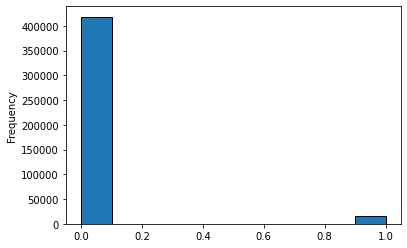

In [216]:
train_identity["isFraud"].plot(kind='hist',edgecolor='black')

We can see that there are much less fraud transactions compared to non-fradulent ones. The overall performance of any model trained on such data will be constrained by its ability to predict rare points (Fraud ones). In order to better the data that we have, we use the method of oversampling.

Before we proceed, we replace the continous columns in "train_identity" with the standardized data.

In [217]:
train_identity[test_cols] = test_df

In [218]:
test_identity.isna().sum()

TransactionID                0
TransactionDT                0
TransactionAmt               0
card1                        0
card2                     2229
card3                      384
card5                     1084
addr1                        0
addr2                        0
dist1                        0
P_emaildomain                0
R_emaildomain                0
C1                           0
C2                           0
C3                           0
C4                           0
C5                           0
C6                           0
C7                           0
C8                           0
C9                           0
C10                          0
C11                          0
C12                          0
C13                          0
C14                          0
D1                         334
D4                           0
D10                          0
D15                          0
V1                           0
V2                           0
V3      

In [219]:
# For the remaining null values of test_identity, we can use simple imputation.
newlist = test_identity.columns[test_identity.isna().any()]
print(newlist)

Index(['card2', 'card3', 'card5', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99',
       'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108',
       'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117',
       'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126',
       'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135',
       'V136', 'V137', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285',
       'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294',
       'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303',
       'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312',
       'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321'],
      dtype='object')


In [220]:
# simple imputer for the above mentioned columns.
from sklearn.impute import SimpleImputer

for column in newlist:
    imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')
    test_identity[column] = imputer.fit_transform(test_identity[column].values.reshape(-1,1))[:,0] 


In [221]:
test_identity.isna().sum()

TransactionID             0
TransactionDT             0
TransactionAmt            0
card1                     0
card2                     0
card3                     0
card5                     0
addr1                     0
addr2                     0
dist1                     0
P_emaildomain             0
R_emaildomain             0
C1                        0
C2                        0
C3                        0
C4                        0
C5                        0
C6                        0
C7                        0
C8                        0
C9                        0
C10                       0
C11                       0
C12                       0
C13                       0
C14                       0
D1                        0
D4                        0
D10                       0
D15                       0
V1                        0
V2                        0
V3                        0
V5                        0
V6                        0
V7                  

In [222]:
# we need all the columns other than isFraud in X and isFraud data in Y.
# Y = train_identity["isFraud"]
# X = train_identity.loc[:,train_identity.columns!="isFraud"]
# ros = RandomOverSampler(random_state=0)
# old = X
# old["isFraud"] = Y
# X_resampled, Y_resampled = ros.fit_resample(X, Y)
# train_identity = X_resampled
# train_identity["isFraud"] = Y_resampled.tolist()

In [223]:
train_identity.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_36_Unknown_status,id_37_F,id_37_T,id_37_Unknown_status,id_38_F,id_38_T,id_38_Unknown_status,DeviceType_desktop,DeviceType_mobile,DeviceType_unknown
0,0.833594,0,0.798586,-0.370079,-0.998093,-0.592031,-0.28482,0.597005,0.409962,0.079338,...,0.562551,-0.234121,-0.481842,0.562551,-0.37857,-0.360545,0.562551,-0.412917,-0.3229,0.562082
1,-0.444066,0,-0.479029,-0.331292,-1.101362,0.085736,-0.28482,0.645663,1.568003,0.079338,...,0.562551,-0.234121,-0.481842,0.562551,-0.37857,-0.360545,0.562551,-0.412917,-0.3229,0.562082
2,0.753182,0,0.724971,-0.079935,-1.459536,0.947197,-0.28482,0.645663,-1.540971,0.079338,...,0.562551,-0.234121,-0.481842,0.562551,-0.37857,-0.360545,0.562551,-0.412917,-0.3229,0.562082
3,-1.309146,0,-1.244970,-0.149058,0.891147,0.947197,-0.28482,0.645663,-1.186256,0.079338,...,-1.777614,-0.234121,2.075366,-1.777614,-0.37857,2.773571,-1.777614,2.421788,-0.3229,-1.779097
4,-0.233354,0,-0.271186,-0.170727,0.595016,-0.262649,-0.28482,0.645663,-0.737645,0.079338,...,0.562551,-0.234121,-0.481842,0.562551,-0.37857,-0.360545,0.562551,-0.412917,-0.3229,0.562082


<AxesSubplot:ylabel='Frequency'>

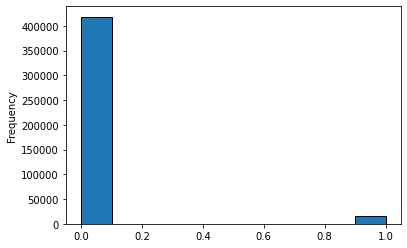

In [224]:
train_identity["isFraud"].plot(kind='hist',edgecolor='black')

In [225]:
#train_identity.to_csv('mycsvfile.csv',index=False)
#old.to_csv('mycsvfile.csv',index=False)

In [226]:
test_identity.shape

(147635, 264)

In [227]:
train_identity.shape

(433584, 266)

In [228]:
for column in train_identity.columns:
    if column not in test_identity.columns:
        print(column)
    else:
        continue

isFraud
id_34_match_status:-1


In [229]:
train_identity.drop(axis="columns",labels="id_34_match_status:-1",inplace=True)

In [230]:
train_identity.shape

(433584, 265)

In [231]:
test_identity.to_csv('mycsvfile2.csv',index=False)

In [232]:
train_identity.to_csv('mycsvfile3.csv',index=False)